In [1]:
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import numpy as np
import math
import copy
from matplotlib.patches import Circle

In [2]:
# 衛星之參數設定
sin37 = math.sin(math.pi/180*37) # 0.601
sin53 = math.sin(math.pi/180*53) # 0.798
sin378 = math.sin(math.pi/180*37.8)
sin532 = math.sin(math.pi/180*53.2)
SatellitePerOrbit = 6
SatelliteSpace = 1.976 # 衛星之間的距離為 1976.6329km
OrbitLength = SatelliteSpace * SatellitePerOrbit
SatelliteVelocity = 7.61268 * math.pow(10, -3) # 因為地圖單位為 10**-3
# PeriodOrbit = int(OrbitLength / SatelliteVelocity) # 1557s 繞一圈 # 好像用不到
NumberOfOrbit = 7 # 每個顏色的軌道有 7 個

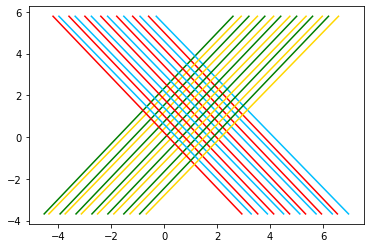

In [486]:
def generateOrbit():
    """
        生成衛星軌道
    """
    # *********************** 毫秒 為單位 *********************** # 
    RedLine_x = np.zeros([NumberOfOrbit, 1557000])
    GreenLine_x = np.zeros([NumberOfOrbit, 1557000])
    BlueLine_x = np.zeros([NumberOfOrbit, 1557000])
    GlodLine_x = np.zeros([NumberOfOrbit, 1557000])

    # y 軸
    y_start = 5.789051883926725
    y_end = -3.6795707231939776
    y_table = np.linspace(y_start, y_end, 1557000)

    # x 軸
    for i in range(NumberOfOrbit):
        RedLine_x[i] = np.linspace(-SatelliteSpace/2*sin37-sin37*i, SatelliteSpace/2*sin37-sin37*i+sin37*((SatellitePerOrbit-1)*SatelliteSpace), 1557000)
        GreenLine_x[i] = np.linspace(2+sin37*i+SatelliteSpace/2*sin37, 2+sin37*i-sin37*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin37, 1557000)
        BlueLine_x[i] = np.linspace(0.3-SatelliteSpace/2*sin378-sin378*i, 0.3+SatelliteSpace/2*sin378-sin378*i+sin378*((SatellitePerOrbit-1)*SatelliteSpace), 1557000)
        GlodLine_x[i] = np.linspace(2.3+sin378*i+SatelliteSpace/2*sin378, 2.3+sin378*i-sin378*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin378, 1557000)

    return RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x, y_table
    # *********************** 毫秒 為單位 *********************** # 
#     # *********************** 秒 為單位 *********************** # 
#     RedLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
#     GreenLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
#     BlueLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])
#     GlodLine_x = np.zeros([NumberOfOrbit, int(OrbitLength / SatelliteVelocity)])

#     # y 軸
#     y_start = 5.789051883926725
#     y_end = -3.6795707231939776
#     y_table = np.linspace(y_start, y_end, int(OrbitLength / SatelliteVelocity))

#     # x 軸
#     for i in range(NumberOfOrbit):
#         RedLine_x[i] = np.linspace(-SatelliteSpace/2*sin37-sin37*i, SatelliteSpace/2*sin37-sin37*i+sin37*((SatellitePerOrbit-1)*SatelliteSpace), int(OrbitLength / SatelliteVelocity))
#         GreenLine_x[i] = np.linspace(2+sin37*i+SatelliteSpace/2*sin37, 2+sin37*i-sin37*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin37, int(OrbitLength / SatelliteVelocity))
#         BlueLine_x[i] = np.linspace(0.3-SatelliteSpace/2*sin378-sin378*i, 0.3+SatelliteSpace/2*sin378-sin378*i+sin378*((SatellitePerOrbit-1)*SatelliteSpace), int(OrbitLength / SatelliteVelocity))
#         GlodLine_x[i] = np.linspace(2.3+sin378*i+SatelliteSpace/2*sin378, 2.3+sin378*i-sin378*((SatellitePerOrbit-1)*SatelliteSpace)-SatelliteSpace/2*sin378, int(OrbitLength / SatelliteVelocity))

#     return RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x, y_table
#     # *********************** 秒 為單位 *********************** # 

RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x, y_table = generateOrbit()

# 畫線
for i in range(NumberOfOrbit):
    plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
    plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
    plt.plot([BlueLine_x[i][0], BlueLine_x[i][-1]], [y_table[0], y_table[-1]], color='deepskyblue')
    plt.plot([GlodLine_x[i][0], GlodLine_x[i][-1]], [y_table[0], y_table[-1]], color='gold')
    

In [481]:
RedLine_x.shape

(7, 1557000)

In [487]:
All_Center = np.zeros([NumberOfOrbit*SatellitePerOrbit*4, 2]) # 所有衛星的中心位置 # 共有 7 * 6 * 4 個衛星, (x,y)共兩軸

def Inintial_All_Center(All_Center):
    """
        初始化所有衛星的起始點
    """
    # *********************** 毫秒 為單位 *********************** # 
    Index_RedLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_GreenLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_BlueLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_GlodLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    for i in range(NumberOfOrbit):
        if i % 2 == 1:
            Index_RedLocation[i] = np.linspace(0, int(1557000 * 5 / 6 ), SatellitePerOrbit).astype(int)
            Index_GreenLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int) + int(1557000 / 6 / 2)
            Index_BlueLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int)
            Index_GlodLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int)
        else:
            Index_RedLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int) + int(1557000 / 6 / 2)
            Index_GreenLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int)
            Index_BlueLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int) + int(1557000 / 6 / 2)
            Index_GlodLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int) + int(1557000 / 6 / 2)

    Index_BlueLocation += int(1557000 / 6 / 4)
    Index_GlodLocation += int(1557000 / 6 / 4)

    for i in range(NumberOfOrbit):
        for s in range(SatellitePerOrbit):
            RedCenter_x = RedLine_x[i][int(Index_RedLocation[i][s])]
            RedCenter_y = y_table[int(Index_RedLocation[i][s])]
            GreenCenter_x = GreenLine_x[i][int(Index_GreenLocation[i][s])]
            GreenCenter_y = y_table[int(Index_GreenLocation[i][s])]
            BlueCenter_x = BlueLine_x[i][int(Index_BlueLocation[i][s])]
            BlueCenter_y = y_table[int(Index_BlueLocation[i][s])]
            GlodCenter_x = GlodLine_x[i][int(Index_GlodLocation[i][s])]
            GlodCenter_y = y_table[int(Index_GlodLocation[i][s])]
            All_Center[i * 24 + s * 4] = RedCenter_x, RedCenter_y
            All_Center[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
            All_Center[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
            All_Center[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
            # ------------------------------- plt ------------------------------- 
            plt.scatter(RedCenter_x, RedCenter_y, color='r', s=200)
            circle1 = plt.Circle([RedCenter_x, RedCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            
            plt.scatter(GlodCenter_x, GlodCenter_y, color='r', s=200)
            circle1 = plt.Circle([GlodCenter_x, GlodCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            
            plt.scatter(GreenCenter_x, GreenCenter_y, color='r', s=200)
            circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            
            plt.scatter(BlueCenter_x, BlueCenter_y, color='r', s=200)
            circle1 = plt.Circle([BlueCenter_x, BlueCenter_y], 0.5735, color='k', fill=False, linewidth=1)
            plt.gca().add_patch(circle1)
            # ------------------------------- plt ------------------------------- 
    return All_Center
    # *********************** 毫秒 為單位 *********************** # 
#     # *********************** 秒 為單位 *********************** # 
#     Index_RedLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
#     Index_GreenLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
#     Index_BlueLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
#     Index_GlodLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
#     for i in range(NumberOfOrbit):
#         if i % 2 == 1:
#             Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6 ), SatellitePerOrbit).astype(int)
#             Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
#             Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
#             Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
#         else:
#             Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
#             Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
#             Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
#             Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)

#     Index_BlueLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)
#     Index_GlodLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)

#     for i in range(NumberOfOrbit):
#         for s in range(SatellitePerOrbit):
#             RedCenter_x = RedLine_x[i][int(Index_RedLocation[i][s])]
#             RedCenter_y = y_table[int(Index_RedLocation[i][s])]
#             GreenCenter_x = GreenLine_x[i][int(Index_GreenLocation[i][s])]
#             GreenCenter_y = y_table[int(Index_GreenLocation[i][s])]
#             BlueCenter_x = BlueLine_x[i][int(Index_BlueLocation[i][s])]
#             BlueCenter_y = y_table[int(Index_BlueLocation[i][s])]
#             GlodCenter_x = GlodLine_x[i][int(Index_GlodLocation[i][s])]
#             GlodCenter_y = y_table[int(Index_GlodLocation[i][s])]
#             All_Center[i * 24 + s * 4] = RedCenter_x, RedCenter_y
#             All_Center[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
#             All_Center[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
#             All_Center[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
#             # ------------------------------- plt ------------------------------- 
#             plt.scatter(RedCenter_x, RedCenter_y, color='r', s=200)
#             circle1 = plt.Circle([RedCenter_x, RedCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)
            
#             plt.scatter(GlodCenter_x, GlodCenter_y, color='r', s=200)
#             circle1 = plt.Circle([GlodCenter_x, GlodCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)
            
#             plt.scatter(GreenCenter_x, GreenCenter_y, color='r', s=200)
#             circle1 = plt.Circle([GreenCenter_x, GreenCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)
            
#             plt.scatter(BlueCenter_x, BlueCenter_y, color='r', s=200)
#             circle1 = plt.Circle([BlueCenter_x, BlueCenter_y], 0.5735, color='k', fill=False, linewidth=1)
#             plt.gca().add_patch(circle1)
#             # ------------------------------- plt ------------------------------- 
#     return All_Center
#     # *********************** 秒 為單位 *********************** # 

In [506]:
def Satellites_Centers_at_time(Centers, millisecond):
    """
        衛星在經過 second 秒後，所在的位置
    """
    # *********************** 毫秒 為單位 *********************** # 
    Index_RedLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_GreenLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_BlueLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    Index_GlodLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
    for i in range(NumberOfOrbit):
        if i % 2 == 1:
            Index_RedLocation[i] = np.linspace(0, int(1557000 * 5 / 6 ), SatellitePerOrbit).astype(int)
            Index_GreenLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int) + int(1557000 / 6 / 2)
            Index_BlueLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int)
            Index_GlodLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int)
        else:
            Index_RedLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int) + int(1557000 / 6 / 2)
            Index_GreenLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int)
            Index_BlueLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int) + int(1557000 / 6 / 2)
            Index_GlodLocation[i] = np.linspace(0, int(1557000 * 5 / 6), SatellitePerOrbit).astype(int) + int(1557000 / 6 / 2)

    Index_BlueLocation += int(1557000 / 6 / 4)
    Index_GlodLocation += int(1557000 / 6 / 4)
    
    Temporary_Centers = copy.deepcopy(Centers)
    for i in range(NumberOfOrbit):
        for s in range(SatellitePerOrbit):
            RedCenter_x = RedLine_x[i][(int(Index_RedLocation[i][s])+millisecond)%1557000]
            RedCenter_y = y_table[(int(Index_RedLocation[i][s])+millisecond)%1557000]
            GreenCenter_x = GreenLine_x[i][(int(Index_GreenLocation[i][s])-millisecond)%1557000]
            GreenCenter_y = y_table[(int(Index_GreenLocation[i][s])-millisecond)%1557000]
            BlueCenter_x = BlueLine_x[i][(int(Index_BlueLocation[i][s])+millisecond)%1557000]
            BlueCenter_y = y_table[(int(Index_BlueLocation[i][s])+millisecond)%1557000]
            GlodCenter_x = GlodLine_x[i][(int(Index_GlodLocation[i][s])-millisecond)%1557000]
            GlodCenter_y = y_table[(int(Index_GlodLocation[i][s])-millisecond)%1557000]

            Temporary_Centers[i * 24 + s * 4] = RedCenter_x, RedCenter_y
            Temporary_Centers[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
            Temporary_Centers[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
            Temporary_Centers[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
#             # ------------------------------- plt -------------------------------             
#             plt.scatter(RedCenter_x, RedCenter_y, color='y', s=200)
#             plt.scatter(GreenCenter_x, GreenCenter_y, color='y', s=200)
#             plt.scatter(BlueCenter_x, BlueCenter_y, color='y', s=200)
#             plt.scatter(GlodCenter_x, GlodCenter_y, color='y', s=200)
#             # ------------------------------- plt ------------------------------- 
    return Temporary_Centers
    # *********************** 毫秒 為單位 *********************** # 
    
#     # *********************** 秒 為單位 *********************** # 
#     Index_RedLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
#     Index_GreenLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
#     Index_BlueLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
#     Index_GlodLocation = np.zeros([NumberOfOrbit, SatellitePerOrbit])
#     for i in range(NumberOfOrbit):
#         if i % 2 == 1:
#             Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6 ), SatellitePerOrbit).astype(int)
#             Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
#             Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
#             Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
#         else:
#             Index_RedLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
#             Index_GreenLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int)
#             Index_BlueLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)
#             Index_GlodLocation[i] = np.linspace(0, int(OrbitLength / SatelliteVelocity * 5 / 6), SatellitePerOrbit).astype(int) + int(OrbitLength / SatelliteVelocity / 6 / 2)

#     Index_BlueLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)
#     Index_GlodLocation += int(OrbitLength / SatelliteVelocity / 6 / 4)
    
#     Temporary_Centers = copy.deepcopy(Centers)
#     for i in range(NumberOfOrbit):
#         for s in range(SatellitePerOrbit):
#             RedCenter_x = RedLine_x[i][(int(Index_RedLocation[i][s])+second)%1557]
#             RedCenter_y = y_table[(int(Index_RedLocation[i][s])+second)%1557]
#             GreenCenter_x = GreenLine_x[i][(int(Index_GreenLocation[i][s])-second)%1557]
#             GreenCenter_y = y_table[(int(Index_GreenLocation[i][s])-second)%1557]
#             BlueCenter_x = BlueLine_x[i][(int(Index_BlueLocation[i][s])+second)%1557]
#             BlueCenter_y = y_table[(int(Index_BlueLocation[i][s])+second)%1557]
#             GlodCenter_x = GlodLine_x[i][(int(Index_GlodLocation[i][s])-second)%1557]
#             GlodCenter_y = y_table[(int(Index_GlodLocation[i][s])-second)%1557]

#             Temporary_Centers[i * 24 + s * 4] = RedCenter_x, RedCenter_y
#             Temporary_Centers[i * 24 + s * 4 + 1] = GreenCenter_x, GreenCenter_y
#             Temporary_Centers[i * 24 + s * 4 + 2] = BlueCenter_x, BlueCenter_y
#             Temporary_Centers[i * 24 + s * 4 + 3] = GlodCenter_x, GlodCenter_y
# #             # ------------------------------- plt -------------------------------             
# #             plt.scatter(RedCenter_x, RedCenter_y, color='y')
# #             plt.scatter(GreenCenter_x, GreenCenter_y, color='y')
# #             plt.scatter(BlueCenter_x, BlueCenter_y, color='y')
# #             plt.scatter(GlodCenter_x, GlodCenter_y, color='y')
# #             # ------------------------------- plt ------------------------------- 
#     return Temporary_Centers
#     # *********************** 秒 為單位 *********************** # 

([<matplotlib.axis.YTick at 0x23030845be0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

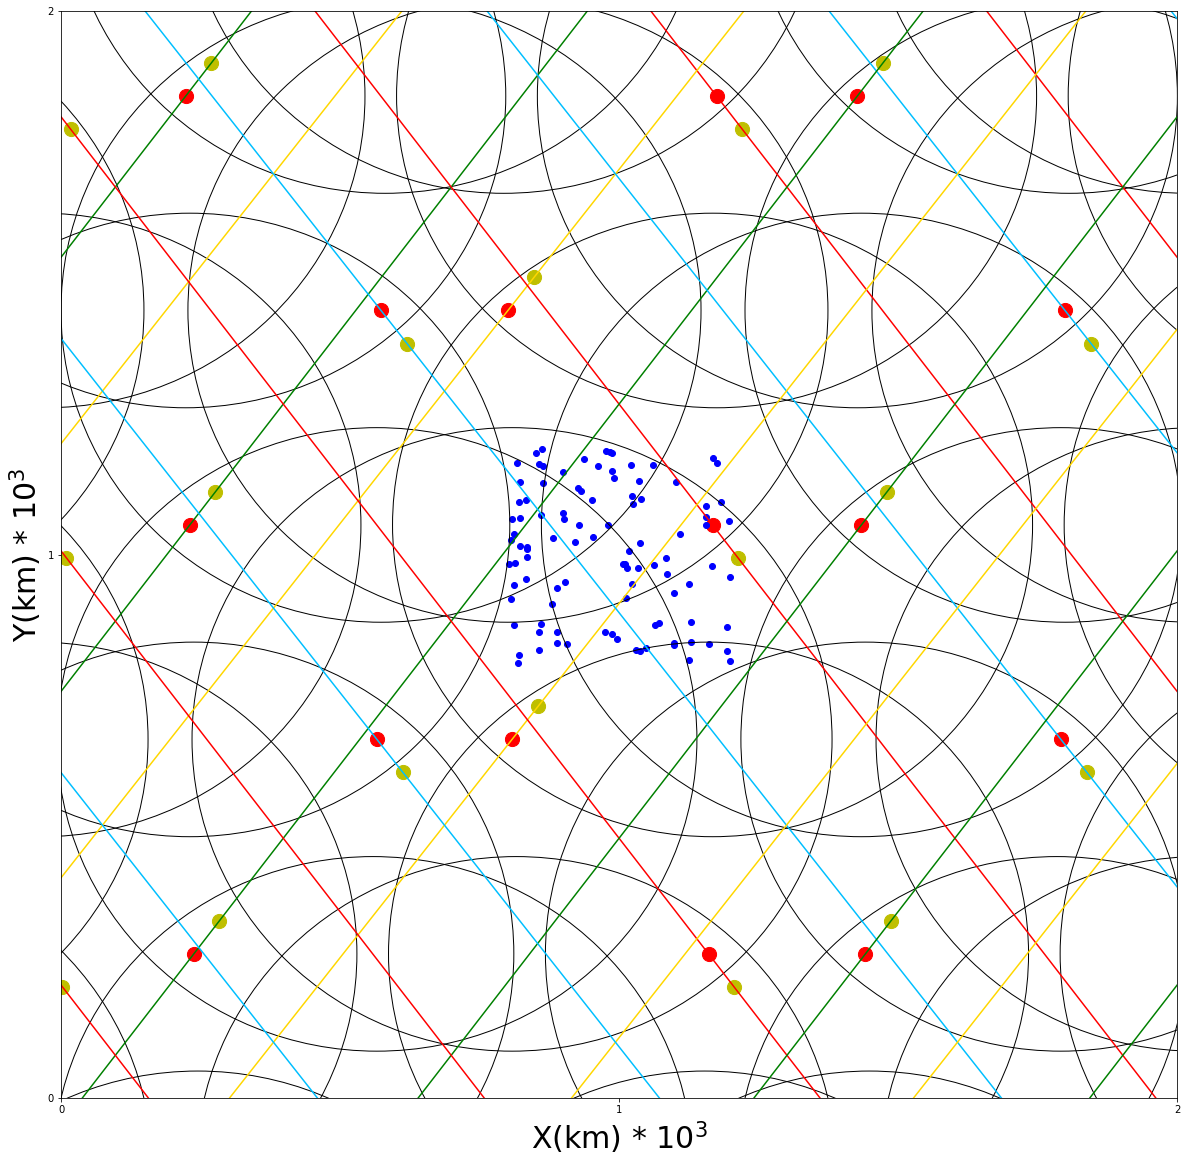

In [499]:
plt.figure(figsize=(20, 20))
# plt.style.use('classic')
plt.xlabel("X(km) * $\mathregular{10^3}$", fontsize=30)
plt.ylabel("Y(km) * $\mathregular{10^3}$", fontsize=30)

# RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x = generateOrbit()
All_Center = np.zeros([NumberOfOrbit*SatellitePerOrbit*4, 2]) # 所有衛星的中心位置 # 共有 7 * 6 * 4 個衛星, (x,y)共兩軸
All_Center = Inintial_All_Center(All_Center)

# 畫線
for i in range(NumberOfOrbit):
    plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
    plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
    plt.plot([BlueLine_x[i][0], BlueLine_x[i][-1]], [y_table[0], y_table[-1]], color='deepskyblue')
    plt.plot([GlodLine_x[i][0], GlodLine_x[i][-1]], [y_table[0], y_table[-1]], color='gold')
    
Satellites_Centers_at_time(All_Center, 10000)

plt.xlim(0,2)
plt.ylim(0,2)

points = []
x = [random.uniform(0.8, 1.2) for _ in range(100)]
y = [random.uniform(0.8, 1.2) for _ in range(100)]
for i in range(len(x)):
    points.append((x[i], y[i]))
for i in range(len(x)):
    plt.scatter(points[i][0], points[i][1], c="b")

linspace = np.linspace(0, 2, 3)
plt.xticks(linspace)
plt.yticks(linspace)

In [7]:
def MultipleMinimaxLocation(points, p=3):
    global centerPoints
    global PointsWhichCluster
    global cluserPoints
    centerPoints = []
    PointsWhichCluster = []
    centerIndex = []
    index = [i for i in range(len(points))] # list 從 0 到 points 數
    centerIndex = random.sample(index, p) # 從中隨機取 p 個點，不重複。 ex.[0, 15, 7]
    # print(centerIndex)
    for i in centerIndex: # 找出 p 個 centres 的位置
        centerPoints.append((points[i][0], points[i][1]))
    #     plt.scatter(points[i][0], points[i][1],s=300, marker='*', c='k')

    for i in range(len(points)): # 每一個點分群到最近的 p_centre
        Dif = []
        for j in range(len(centerPoints)):
            dif = math.sqrt(math.pow(points[i][0] - centerPoints[j][0], 2) + math.pow(points[i][1] - centerPoints[j][1], 2))
            Dif.append(dif)
        PointsWhichCluster.append(Dif.index(min(Dif)))
        
    # 得到每一點分屬於哪一群
    # PointsWhichCluster: [1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1]
    npPointsWhichCluster = np.array(PointsWhichCluster)
    npPoints = np.array(points)
#     # ----------------------------- 如果某群中的點小於三的話 -----------------------------
#     i = 0
#     while i < p:
#         if(len(np.where(npPointsWhichCluster==i)[0])<3):
#             print('***************************************')
#             centerPoints = []
#             PointsWhichCluster = []
#             index = [_ for _ in range(len(points))] # list 從 0 到 points 數
#             centerIndex = random.sample(index, p) # 從中隨機取 p 個點，不重複。 ex.[0, 15, 7]
#             for _ in centerIndex:
#                 centerPoints.append((points[_][0], points[_][1]))
#             for j in range(len(points)):
#                 Dif = []
#                 for k in range(len(centerPoints)):
#                     dif = math.sqrt(math.pow(points[j][0] - centerPoints[k][0], 2) + math.pow(points[j][1] - centerPoints[k][1], 2))
#                     Dif.append(dif)
#                 PointsWhichCluster.append(Dif.index(min(Dif)))            
#             npPointsWhichCluster = np.array(PointsWhichCluster)
#             npPoints = np.array(points)
#             i = -1
#         i += 1
#     # ----------------------------------------------------------------------------------    
            
    print('npPointsWhichCluster', npPointsWhichCluster)

    Clusters = []
    BindingSets = []
    Radiis = []
    CurrentPoints = []
    for i in range(p):
        cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
        cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
        Clusters.append(cluserPoints)
        bindingSet, radii, currentPoint = SingleMinimaxLocation(cluserPoints)
        BindingSets.append(bindingSet)
        Radiis.append(radii)
        CurrentPoints.append(currentPoint)

    for i in range(len(PointsWhichCluster)):
        if(PointsWhichCluster[i]==0):
            plt.scatter(points[i][0], points[i][1], c="r")
        elif(PointsWhichCluster[i]==1):
            plt.scatter(points[i][0], points[i][1], c="g")
        else:
            plt.scatter(points[i][0], points[i][1], c="b")
            
    return Clusters, BindingSets, Radiis, CurrentPoints, PointsWhichCluster

# MultipleMinimaxLocation(points, 3)

In [8]:
def SingleMinimaxLocation(points):
    bindingSet = []
    if(len(points)>=3):
        sumx = 0
        sumy = 0
        for i, j in points:
            sumx += i
            sumy += j
        x_0 = sumx / len(points)
        y_0 = sumy / len(points)
        point_0 = (x_0, y_0)
#         print(points)
#         print(point_0)
        triplet = initialTriplet(point_0, points)
#         print('triplet:', triplet)
        while True:
            currentPoint, currentRadii = MinimaxTriplet(triplet)
            furthestPoint, furthestDif = findFurthest(points, currentPoint)
            if(abs(furthestDif-currentRadii)>0.0001):
        #         print("%")
                triplet = FourPointFindTriplet(triplet, furthestPoint) # 生成新的 triplet
            else: # 找到了
                print("currenPoint:", currentPoint)
                print("currentRadii:", currentRadii)
                break
        bindingSet = triplet
        # ---------------- plot ----------------
#         fig = plt.figure(figsize=(6,6))
#         plt.scatter(x_0,y_0,c="b")
        for i, j in points:
            plt.scatter(i, j, c="red")
        for i in range(len(triplet)):
            plt.scatter(triplet[i][0], triplet[i][1], c="g")
#         plt.scatter(currentPoint[0], currentPoint[1], c="y")
        circle = Circle(currentPoint, radius=currentRadii, fill=False)
        plt.gca().add_patch(circle)

        plt.xlabel("X")
        plt.ylabel("Y")
        plt.xlim(-5,15)
        plt.ylim(-5,15)
        plt.title("Simple Scatter Plot")
#         plt.show()
        return bindingSet, currentRadii, currentPoint
        
    else:
        if(len(points)==2):
            sumx = 0
            sumy = 0
            for i, j in points:
                sumx += i
                sumy += j
            x_0 = sumx / len(points)
            y_0 = sumy / len(points)
            point_0 = (x_0, y_0)
            currentPoint, currentRadii = twoPointMedian(points[0], points[1])
            
            for _ in range(len(points)):
                bindingSet.append(points[_])
            # ---------------- plot ----------------
#             fig = plt.figure(figsize=(6,6))
#             plt.scatter(x_0,y_0,c="b")
            for i, j in points:
                plt.scatter(i, j, c="red")
#             plt.scatter(currentPoint[0], currentPoint[1], c="y")
            circle = Circle(currentPoint, radius=currentRadii, fill=False)
            plt.gca().add_patch(circle)

            plt.xlabel("X")
            plt.ylabel("Y")
            plt.xlim(-5,15)
            plt.ylim(-5,15)
            plt.title("Simple Scatter Plot")
#             plt.show()
            return bindingSet, currentRadii, currentPoint

#         elif(len(points)==0):
#             return [0, 0, 0

        else: # len(points)==1
            currentPoint = points[0]
            currentRadii = 0.028 # ==========================
            bindingSet.append(points[0])
            # ---------------- plot ----------------
#             fig = plt.figure(figsize=(6,6))
#             plt.scatter(currentPoint[0], currentPoint[1], c="y")
            circle = Circle(currentPoint, radius=currentRadii, fill=False)
            plt.gca().add_patch(circle)

            plt.xlabel("X")
            plt.ylabel("Y")
            plt.xlim(-5,15)
            plt.ylim(-5,15)
            plt.title("Simple Scatter Plot")
#             plt.show()
            return bindingSet, currentRadii, currentPoint

In [9]:
def calculateDistance2p(p1, p2):
    """給定兩點，回傳兩點距離"""
    dif = math.sqrt(math.pow(p1[0]-p2[0], 2) + math.pow(p1[1]-p2[1], 2))
    return dif

In [10]:
def findFurthest(points, p2):
    """給點集合和一點，回傳點集合中距離一點最遠的點"""
    Dif = []
    for i in range(len(points)):
        Dif.append(calculateDistance2p(points[i], p2))
    point = points[Dif.index(max(Dif))]
    maxDif = max(Dif)
    return point, maxDif

In [11]:
def twoPointMedian(p1, p2):
    """給定兩點，回傳其中點及半徑"""
    midx = (p1[0] + p2[0]) / 2
    midy = (p1[1] + p2[1]) / 2
    dif = math.sqrt(math.pow(p1[0]-p2[0], 2) + math.pow(p1[1]-p2[1], 2))
    radius = dif / 2
    return (midx, midy), radius

In [12]:
def initialTriplet(point0, points):
    triplet = []
    Dis = []
    for i in range(len(points)):
        dis = math.sqrt(math.pow(point0[0] - points[i][0], 2) + math.pow(point0[1] - points[i][1], 2))
        Dis.append(dis)
    SortedDis = sorted(Dis, reverse=True)
    for i in range(3):
        triplet.append((points[Dis.index(SortedDis[i])][0], points[Dis.index(SortedDis[i])][1]))
    return triplet

In [13]:
def MinimaxTriplet(triplet):
    """找出 triplet 中的 minimax location"""
    for i in range(3):
        currentPoint, currentRadii = twoPointMedian(triplet[i%3], triplet[(i+1)%3])
        dif = math.sqrt(math.pow(currentPoint[0]-triplet[(i+2)%3][0] ,2) + math.pow(currentPoint[1]-triplet[(i+2)%3][1] ,2))
        if(dif<=currentRadii):
            return currentPoint, currentRadii
    return get_circle(triplet[0], triplet[1], triplet[2])

In [14]:
def get_circle(p1,p2,p3):
    '''三点求圆，返回圆心和半径'''
    x, y, z = p1[0]+p1[1]*1j, p2[0]+p2[1]*1j, p3[0]+p3[1]*1j
    w = z-x
    w /= y-x
    c = (x-y)*(w-abs(w)**2)/2j/w.imag-x 
    return (-c.real,-c.imag),abs(c+x)

In [15]:
def FourPointFindTriplet(triplet, p):
    if p in triplet:
        return triplet
    radiiList = []
    fourPoints = list.copy(triplet)
    fourPoints.append(p)
    for i in range(4):
        _ = list.copy(fourPoints)
        _.pop(i)
        currentPoint, currentRadii = MinimaxTriplet(_)
        radiiList.append(currentRadii)
#     fourPoints.pop(radiiList.index(max(radiiList)))
#     random.sample(fourPoints, k = 3)
    return random.sample(fourPoints, k = 3)

In [16]:
def MultipleMinimaxLocation(points, p=3):
    global centerPoints
    global PointsWhichCluster
    global cluserPoints
    centerPoints = []
    PointsWhichCluster = []
    centerIndex = []
    index = [i for i in range(len(points))] # list 從 0 到 points 數
    centerIndex = random.sample(index, p) # 從中隨機取 p 個點，不重複。 ex.[0, 15, 7]
    # print(centerIndex)
    for i in centerIndex: # 找出 p 個 centres 的位置
        centerPoints.append((points[i][0], points[i][1]))
    #     plt.scatter(points[i][0], points[i][1],s=300, marker='*', c='k')

    for i in range(len(points)): # 每一個點分群到最近的 p_centre
        Dif = []
        for j in range(len(centerPoints)):
            dif = math.sqrt(math.pow(points[i][0] - centerPoints[j][0], 2) + math.pow(points[i][1] - centerPoints[j][1], 2))
            Dif.append(dif)
        PointsWhichCluster.append(Dif.index(min(Dif)))
        
    # 得到每一點分屬於哪一群
    # PointsWhichCluster: [1, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 0, 2, 0, 1]
    npPointsWhichCluster = np.array(PointsWhichCluster)
    npPoints = np.array(points)
    print('npPointsWhichCluster', npPointsWhichCluster)

    Clusters = []
    BindingSets = []
    Radiis = []
    CurrentPoints = []
    for i in range(p):
        cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
        cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
        Clusters.append(cluserPoints)
        bindingSet, radii, currentPoint = SingleMinimaxLocation(cluserPoints)
        BindingSets.append(bindingSet)
        Radiis.append(radii)
        CurrentPoints.append(currentPoint)

    for i in range(len(PointsWhichCluster)):
        if(PointsWhichCluster[i]==0):
            plt.scatter(points[i][0], points[i][1], c="r")
        elif(PointsWhichCluster[i]==1):
            plt.scatter(points[i][0], points[i][1], c="g")
        else:
            plt.scatter(points[i][0], points[i][1], c="b")
            
    return Clusters, BindingSets, Radiis, CurrentPoints, PointsWhichCluster

In [17]:
def rearrangement(points, Clusters, BindingSets, Radiis, PointsWhichCluster):
    bindingsetIndex = []
    try_PointsWhichCluster = PointsWhichCluster.copy()
    tmp_Radiis = sorted(Radiis)
    index = [ _ for _ in range(len(Clusters))]
    index.remove(Radiis.index(tmp_Radiis[-1])) # -1 為 max, -2 為 第二大
    tmp_bindingset = BindingSets[Radiis.index(tmp_Radiis[-1])]

    for i in tmp_bindingset:
        bindingsetIndex.append(points.index(i))

# #     # ------------------------------------- 找最大圓 -------------------------------------
#     a = 0
#     while a < 10:
#         index = [ _ for _ in range(len(BindingSets))]
#         bindingsetIndex = []
#         tmp_Radiis = sorted(Radiis)
#         index.remove(Radiis.index(tmp_Radiis[-1])) # -1 為 max, -2 為 第二大
#         tmp_bindingset = BindingSets[Radiis.index(tmp_Radiis[-1])]
#         for i in tmp_bindingset:
#             bindingsetIndex.append(points.index(i))
#         print('bindingsetIndex:', bindingsetIndex)
#         for i in bindingsetIndex:
#             for j in index:
#                 try_PointsWhichCluster = PointsWhichCluster.copy()
#                 try_PointsWhichCluster[i] = j
#                 npPointsWhichCluster = np.array(try_PointsWhichCluster)
#                 npPoints = np.array(points)
#                 print('    PointsWhichCluster:', PointsWhichCluster)
#                 print('try_PointsWhichCluster:', try_PointsWhichCluster)
#                 print('    PointsWhichCluster:', PointsWhichCluster[i])
#                 print('try_PointsWhichCluster:', try_PointsWhichCluster[i])
#             #         print(Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]])
#                 print(Radiis)
#                 print(try_PointsWhichCluster[i])
#                 print(max(Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]]))
#                 setjIndex = PointsWhichCluster[i]
#                 setkIndex = try_PointsWhichCluster[i]
#                 setjPoints = npPoints[np.where(npPointsWhichCluster==setjIndex)[0]]
#                 setjPoints = list(map(tuple, setjPoints))
#                 setkPoints = npPoints[np.where(npPointsWhichCluster==setkIndex)[0]]
#                 setkPoints = list(map(tuple, setkPoints))
#                 print('setjPoints', setjPoints)
#                 if(len(setjPoints)==0 or len(setkPoints)==0):
#                     continue
#                 bindingSetj, setjRadii, _ = SingleMinimaxLocation(setjPoints)
#                 bindingSetk, setkRadii, _ = SingleMinimaxLocation(setkPoints)
#             #         print(setjRadii, setkRadii)
#                 print('before', Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]])
#                 print('after', setjRadii, setkRadii)
#                 if(max(setjRadii, setkRadii) < max(Radiis[setjIndex], Radiis[setkIndex])):
#                     PointsWhichCluster = try_PointsWhichCluster
#                     Radiis[setjIndex] = setjRadii
#                     Radiis[setkIndex] = setkRadii
#                     BindingSets[setjIndex] = bindingSetj
#                     BindingSets[setkIndex] = bindingSetk
#                     print('After rearrangement **************************************')
#                     print('    PointsWhichCluster:', PointsWhichCluster)
#                     print('try_PointsWhichCluster:', try_PointsWhichCluster)
#                     print(' *********************************************************')
#                     Clusters = []
#                     npPointsWhichCluster = np.array(PointsWhichCluster)
#                     npPoints = np.array(points)
#                     for i in range(len(BindingSets)):
#                         cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
#                         cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
#                         Clusters.append(cluserPoints)
#                     a = 0
#         a += 1
# #    # ------------------------------------- 找最大圓 -------------------------------------

    # ------------------------------------- 全迭代 ---------------------------------------  
    for t in range(len(BindingSets)-1):
        a = 0
        while a < 3:
            index = [ _ for _ in range(len(BindingSets))]
            bindingsetIndex = []
            tmp_Radiis = sorted(Radiis)
            index.remove(Radiis.index(tmp_Radiis[-t-1])) # -1 為 max, -2 為 第二大
            tmp_bindingset = BindingSets[Radiis.index(tmp_Radiis[-t-1])]
            for i in tmp_bindingset:
                bindingsetIndex.append(points.index(i))
            print('bindingsetIndex:', bindingsetIndex)
            for i in bindingsetIndex:
                for j in index:
                    try_PointsWhichCluster = PointsWhichCluster.copy()
                    try_PointsWhichCluster[i] = j
                    npPointsWhichCluster = np.array(try_PointsWhichCluster)
                    npPoints = np.array(points)
#                     print('    PointsWhichCluster:', PointsWhichCluster)
#                     print('try_PointsWhichCluster:', try_PointsWhichCluster)
#                     print('    PointsWhichCluster:', PointsWhichCluster[i])
#                     print('try_PointsWhichCluster:', try_PointsWhichCluster[i])
            #         print(Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]])
#                     print(Radiis)
#                     print(try_PointsWhichCluster[i])
#                     print(max(Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]]))
                    setjIndex = PointsWhichCluster[i]
                    setkIndex = try_PointsWhichCluster[i]
                    setjPoints = npPoints[np.where(npPointsWhichCluster==setjIndex)[0]]
                    setjPoints = list(map(tuple, setjPoints))
                    setkPoints = npPoints[np.where(npPointsWhichCluster==setkIndex)[0]]
                    setkPoints = list(map(tuple, setkPoints))
#                     print('setjPoints', setjPoints)
                    if(len(setjPoints)==0 or len(setkPoints)==0):
                        continue
                    bindingSetj, setjRadii, _ = SingleMinimaxLocation(setjPoints)
                    bindingSetk, setkRadii, _ = SingleMinimaxLocation(setkPoints)
            #         print(setjRadii, setkRadii)
#                     print('before', Radiis[PointsWhichCluster[i]], Radiis[try_PointsWhichCluster[i]])
#                     print('after', setjRadii, setkRadii)
                    if(max(setjRadii, setkRadii) < max(Radiis[setjIndex], Radiis[setkIndex])):
                        PointsWhichCluster = try_PointsWhichCluster
                        Radiis[setjIndex] = setjRadii
                        Radiis[setkIndex] = setkRadii
                        BindingSets[setjIndex] = bindingSetj
                        BindingSets[setkIndex] = bindingSetk
                        print('After rearrangement **************************************')
                        print('    PointsWhichCluster:', PointsWhichCluster)
                        print('try_PointsWhichCluster:', try_PointsWhichCluster)
                        print(' *********************************************************')
                        Clusters = []
                        npPointsWhichCluster = np.array(PointsWhichCluster)
                        npPoints = np.array(points)
                        for i in range(len(BindingSets)):
                            cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
                            cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
                            Clusters.append(cluserPoints)
                        a = 0
            a += 1
    # ------------------------------------- 全迭代 ---------------------------------------
    plt.clf()
    npPointsWhichCluster = np.array(PointsWhichCluster)
    npPoints = np.array(points)
    Clusters = []
    CurrentPoints = [] # cluster 的中心
    
    for i in range(len(BindingSets)):
        cluserPoints = npPoints[np.where(npPointsWhichCluster==i)[0]]
        cluserPoints = list(map(tuple, cluserPoints)) # [(...), (...),...,(...)]
        Clusters.append(cluserPoints)
        bindingSet, radii, currentPoint = SingleMinimaxLocation(cluserPoints)
        CurrentPoints.append(currentPoint)

    for i in range(len(PointsWhichCluster)):
        if(PointsWhichCluster[i]==0):
            plt.scatter(points[i][0], points[i][1], c="r")
        elif(PointsWhichCluster[i]==1):
            plt.scatter(points[i][0], points[i][1], c="g")
        else:
            plt.scatter(points[i][0], points[i][1], c="b")
            
#     print(points, Clusters, BindingSets, Radiis, PointsWhichCluster)
    return points, Clusters, BindingSets, Radiis, PointsWhichCluster, CurrentPoints

In [18]:
# points = []
# x = [random.uniform(0.8, 1.2) for _ in range(100)]
# y = [random.uniform(0.8, 1.2) for _ in range(100)]
# for i in range(len(x)):
#     points.append((x[i], y[i]))

In [19]:
# fig = plt.figure(figsize=(6,6))
# Clusters, BindingSets, Radiis, CurrentPoints, PointsWhichCluster = MultipleMinimaxLocation(points, 19)
# plt.xlim(0.8,1.2)
# plt.ylim(0.8,1.2)

In [20]:
# plt.figure(figsize=(6,6))
# points, Clusters, BindingSets, Radiis, PointsWhichCluster, CurrentPoints = rearrangement(points, Clusters, BindingSets, Radiis, PointsWhichCluster)
# plt.xlim(0.8,1.2)
# plt.ylim(0.8,1.2)

npPointsWhichCluster [12  9 17 14  0  7  3 15 17 12 10  3 10  0 17 11  7  3  1 18  3 12  4  4
 12  8 12  7  9  4  7 17  8 12  4  0  5 17 16 10  4  7  0  6 10 12  3 18
  2 13 12 18  7  7 17  1 17 17  4 12  0 10 13  3  1 17  8 12  4 16 11 17
  1 14  3 18  5 15  7  3 13  2  6  7 16  8  3  5  2 13  6  1 12  0 18  5
  3 12  0  7]
currenPoint: (1.074930925647272, 0.8565410620910865)
currentRadii: 0.035065078745170467
currenPoint: (1.1841695716541545, 1.142021052404492)
currentRadii: 0.05168485513797317
currenPoint: (0.9359999649841764, 1.072293780684522)
currentRadii: 0.03929534584656001
currenPoint: (0.9452368857211029, 0.97042605786584)
currentRadii: 0.04507408170571867
currenPoint: (0.9884733668182195, 0.8658464539233354)
currentRadii: 0.06473411092471532
currenPoint: (1.1366831166356333, 1.0685591203697413)
currentRadii: 0.025020864890445867
currenPoint: (1.0954537263268411, 0.9657927364083574)
currentRadii: 0.02023247598122045
currenPoint: (1.0374029491379033, 1.0294697948197564)
curren

currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0078829537635468, 1.0706529558884095)
currentRadii: 0.21472070720207087
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.1477119253556225, 1.0411349219552892)
currentRadii: 0.15679066218745732
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.187351936533188, 1.1172376046975003)
currentRadii: 0.07654759598275268
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (0.9981783271208825, 1.1270662429511615)
currentRadii: 0.1972648334772974
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0413636452319603, 1.181246110493438)
currentRadii: 0.14302660999866607
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0918136810847052, 1

currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0618535041402208, 1.0596893388681476)
currentRadii: 0.1812249524134169
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.1437476349842044, 1.1092104417526691)
currentRadii: 0.09352667777364974
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.144119171750185, 1.0736962756732127)
currentRadii: 0.1264133590444212
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0895950361076892, 1.1246834998425987)
currentRadii: 0.11682169752777183
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.175867186275362, 1.083684980326499)
currentRadii: 0.11030889929191107
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0078459552224084, 1.0

currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0248154418034165, 1.156436431896279)
currentRadii: 0.16333966125394833
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0078829537635468, 1.0706529558884095)
currentRadii: 0.21472070720207087
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.1477119253556225, 1.0411349219552892)
currentRadii: 0.15679066218745732
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.187351936533188, 1.1172376046975003)
currentRadii: 0.07654759598275268
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (0.9981783271208825, 1.1270662429511615)
currentRadii: 0.1972648334772974
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0413636452319603, 1

currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (1.093515501817703, 1.0861890940880743)
currentRadii: 0.13488103558092907
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (0.9254942707647495, 1.018736904384267)
currentRadii: 0.20288313471456923
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (0.934484682941358, 1.0020491130728386)
currentRadii: 0.214111658141602
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (0.9424637573457575, 1.158940545657854)
currentRadii: 0.08638054420863167
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (0.9458504869794035, 1.0513282691413697)
currentRadii: 0.16460291913395456
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (1.0751626103981196, 1.04

currenPoint: (1.000192788201789, 1.0059437963979123)
currentRadii: 0.19369856305828764
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (1.0726709382027297, 1.1171904960136305)
currentRadii: 0.09752515367360484
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (1.02105940391618, 1.0596663833038)
currentRadii: 0.1390599452714715
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (1.0364540431567097, 1.107840096440641)
currentRadii: 0.09250714575645051
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (1.093515501817703, 1.0861890940880743)
currentRadii: 0.13488103558092907
currenPoint: (1.0430077139638156, 1.1487841245674957)
currentRadii: 0.05436052030403897
currenPoint: (0.9254942707647495, 1.018736904384267)
currentRadii: 0.20288313471456923
currenPoint: (1.0430077139638156, 1.148784

currenPoint: (1.0447038309497552, 1.154125086540305)
currentRadii: 0.05387556906656288
currenPoint: (0.9688679598689225, 0.9918871746686623)
currentRadii: 0.12773197753005464
bindingsetIndex: [34, 12, 44]
currenPoint: (0.8790536505440223, 0.8133103775039493)
currentRadii: 0.030282951595304877
currenPoint: (1.0207345129482952, 0.8501750558197053)
currentRadii: 0.07737116272703157
currenPoint: (0.8790536505440223, 0.8133103775039493)
currentRadii: 0.030282951595304877
currenPoint: (1.0689088692253033, 1.002389082753069)
currentRadii: 0.2231869645438954
currenPoint: (0.8790536505440223, 0.8133103775039493)
currentRadii: 0.030282951595304877
currenPoint: (0.9449506006410757, 0.9613311657373214)
currentRadii: 0.15052842376550477
currenPoint: (0.8790536505440223, 0.8133103775039493)
currentRadii: 0.030282951595304877
currenPoint: (0.9360134429076857, 0.9087278302187827)
currentRadii: 0.09929195763788637
currenPoint: (0.8790536505440223, 0.8133103775039493)
currentRadii: 0.030282951595304877


bindingsetIndex: [18, 72, 91]
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.1379565974452888, 1.009826507835584)
currentRadii: 0.18951821546909944
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0473421844267756, 1.117908046052952)
currentRadii: 0.1561365292798816
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0618535041402208, 1.0596893388681476)
currentRadii: 0.1812249524134169
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.0689088692253033, 1.002389082753069)
currentRadii: 0.2231869645438954
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPoint: (1.1437476349842044, 1.1092104417526691)
currentRadii: 0.09352667777364974
currenPoint: (1.1870298575524196, 1.131247603483688)
currentRadii: 0.040989004663514544
currenPo

bindingsetIndex: [92, 26, 21]
currenPoint: (0.8642127297517069, 0.9627487489642255)
currentRadii: 0.04566201672717074
currenPoint: (0.9823121781014286, 0.86494576484342)
currentRadii: 0.11647682405688123
currenPoint: (0.8642127297517069, 0.9627487489642255)
currentRadii: 0.045662016727170726
currenPoint: (1.0282021714370626, 1.0488241553797946)
currentRadii: 0.21263963638712524
currenPoint: (0.8642127297517069, 0.9627487489642255)
currentRadii: 0.045662016727170726
currenPoint: (0.9042439028528351, 1.0077662383640469)
currentRadii: 0.10855040922857634
currenPoint: (0.8642127297517069, 0.9627487489642255)
currentRadii: 0.04566201672717074
currenPoint: (0.9230841966368682, 0.9428256256643475)
currentRadii: 0.0637553770871151
currenPoint: (0.8642127297517069, 0.9627487489642255)
currentRadii: 0.04566201672717074
currenPoint: (0.946985111384785, 0.8586772312314702)
currentRadii: 0.08711176136194615
currenPoint: (0.8642127297517069, 0.9627487489642255)
currentRadii: 0.045662016727170726
cur

currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457874
currenPoint: (0.9029292621599359, 1.0431219932218556)
currentRadii: 0.07600521076909093
currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457874
currenPoint: (0.912885137960186, 0.9764227178968656)
currentRadii: 0.07740267296700347
currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457874
currenPoint: (0.9304797919561614, 0.9072933527068596)
currentRadii: 0.13070056926667972
currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457876
currenPoint: (1.0001559576669148, 1.038262829841638)
currentRadii: 0.16483524933120708
currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457876
currenPoint: (0.9770075667985487, 0.9800269676950665)
currentRadii: 0.13907783174420604
currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457874
currenPoint: (0.9612369138322394, 1.0252

currenPoint: (1.1772679193072526, 1.1376220575495588)
currentRadii: 0.03666064296479317
currenPoint: (1.187351936533188, 1.1172376046975003)
currentRadii: 0.07654759598275268
currenPoint: (1.1772679193072526, 1.1376220575495588)
currentRadii: 0.03666064296479317
currenPoint: (0.9981783271208825, 1.1270662429511615)
currentRadii: 0.1972648334772974
currenPoint: (1.1772679193072526, 1.1376220575495588)
currentRadii: 0.03666064296479317
currenPoint: (1.0413636452319603, 1.181246110493438)
currentRadii: 0.14302660999866607
currenPoint: (1.1772679193072526, 1.1376220575495588)
currentRadii: 0.03666064296479317
currenPoint: (1.0918136810847052, 1.154763479923468)
currentRadii: 0.09993242986104425
currenPoint: (1.1772679193072526, 1.1376220575495588)
currentRadii: 0.03666064296479317
currenPoint: (1.0442289846640098, 1.043413216214965)
currentRadii: 0.20513572498079452
currenPoint: (1.098229178414551, 0.8898178851368381)
currentRadii: 0.06416638189656607
currenPoint: (1.144119171750185, 1.073

currenPoint: (0.9409974985804745, 1.0381673991200393)
currentRadii: 0.030416480024290274
currenPoint: (0.9841441261740058, 0.9145871756945376)
currentRadii: 0.10782178767421942
currenPoint: (0.9409974985804745, 1.0381673991200393)
currentRadii: 0.030416480024290274
currenPoint: (1.0683669202027422, 1.048724300961985)
currentRadii: 0.09615766562963173
currenPoint: (0.9409974985804745, 1.0381673991200393)
currentRadii: 0.030416480024290274
currenPoint: (1.0175081401116277, 0.9797135803408145)
currentRadii: 0.059346328150734526
currenPoint: (0.9409974985804745, 1.0381673991200393)
currentRadii: 0.030416480024290274
currenPoint: (1.0294478763680666, 1.0357473949597464)
currentRadii: 0.05519307737601187
currenPoint: (0.9409974985804745, 1.0381673991200393)
currentRadii: 0.030416480024290274
currenPoint: (1.0750034637051964, 1.0100667846751643)
currentRadii: 0.09976262795047874
currenPoint: (0.9409974985804745, 1.0381673991200393)
currentRadii: 0.030416480024290274
currenPoint: (0.9039071789

currenPoint: (1.016836367399017, 0.9995449993112635)
currentRadii: 0.25610638632672417
currenPoint: (1.0248154418034165, 1.156436431896279)
currentRadii: 0.16333966125394833
currenPoint: (1.0056561375926385, 1.0742399355854657)
currentRadii: 0.21453138451290563
currenPoint: (1.1477119253556225, 1.0411349219552892)
currentRadii: 0.15679066218745732
currenPoint: (1.187351936533188, 1.1172376046975003)
currentRadii: 0.07654759598275268
currenPoint: (0.9981783271208825, 1.1270662429511615)
currentRadii: 0.1972648334772974
currenPoint: (1.0413636452319603, 1.181246110493438)
currentRadii: 0.14302660999866607
currenPoint: (1.0918136810847052, 1.154763479923468)
currentRadii: 0.09993242986104425
currenPoint: (1.0442289846640098, 1.043413216214965)
currentRadii: 0.20513572498079452
currenPoint: (1.140816883343554, 0.9990530589147798)
currentRadii: 0.17983856799116585
currenPoint: (1.0502024703250408, 1.107134597132148)
currentRadii: 0.1537873871164175
currenPoint: (1.064713790038486, 1.0489158

currenPoint: (0.962186839717347, 0.8540413035913772)
currentRadii: 0.07182264867904832
currenPoint: (0.9867170965398898, 0.8403610692073813)
currentRadii: 0.043932590609810286
currenPoint: (1.016091215668981, 0.8522961874856536)
currentRadii: 0.08041442937222804
currenPoint: (0.9867170965398898, 0.8403610692073813)
currentRadii: 0.043932590609810286
currenPoint: (1.061689715964093, 1.010699163515774)
currentRadii: 0.22003045483584013
currenPoint: (0.9867170965398898, 0.8403610692073813)
currentRadii: 0.043932590609810286
currenPoint: (0.9275353050350146, 0.9352168059725342)
currentRadii: 0.10819065367002184
currenPoint: (0.9867170965398898, 0.8403610692073813)
currentRadii: 0.043932590609810286
currenPoint: (0.9287942896464756, 0.9170379109814876)
currentRadii: 0.08998751585471759
currenPoint: (0.9867170965398898, 0.8403610692073813)
currentRadii: 0.043932590609810286
currenPoint: (1.0501488216225692, 0.951521716502228)
currentRadii: 0.166040175880877
currenPoint: (0.9867170965398898, 

currenPoint: (0.9753527516166578, 0.8471048225497699)
currentRadii: 0.04189804259165363
currenPoint: (1.09319057335671, 0.9582485823220388)
currentRadii: 0.16164778616396816
currenPoint: (0.9753527516166578, 0.8471048225497699)
currentRadii: 0.04189804259165363
currenPoint: (0.9186031316873124, 0.9537903584658809)
currentRadii: 0.174000317262876
currenPoint: (0.9753527516166578, 0.8471048225497699)
currentRadii: 0.04189804259165363
currenPoint: (0.9802327413286671, 1.0066275136794092)
currentRadii: 0.19755599691435366
currenPoint: (0.9753527516166578, 0.8471048225497699)
currentRadii: 0.04189804259165363
currenPoint: (1.0202778462709863, 1.0060620879852094)
currentRadii: 0.19265437908415897
currenPoint: (0.9753527516166578, 0.8471048225497699)
currentRadii: 0.04189804259165363
currenPoint: (0.962186839717347, 0.8540413035913772)
currentRadii: 0.07182264867904832
currenPoint: (0.9867170965398898, 0.8403610692073813)
currentRadii: 0.043932590609810286
currenPoint: (1.016091215668981, 0.8

currenPoint: (0.8490113612793766, 1.007480431103572)
currentRadii: 0.09283550214147449
currenPoint: (0.8603118098200319, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.9106409709207313, 1.0603175863171006)
currentRadii: 0.1423898095136005
currenPoint: (0.860311809820032, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.9838331791305384, 1.043422710956952)
currentRadii: 0.15925423727366622
currenPoint: (0.860311809820032, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.9273150364331623, 0.9125358664487683)
currentRadii: 0.04583565709314934
currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457874
currenPoint: (0.9658068586728048, 0.9135618863188093)
currentRadii: 0.15368049921703777
currenPoint: (0.8613763320943449, 0.9582350861234082)
currentRadii: 0.04285878894457883
currenPoint: (1.0116968520084388, 1.0974402768551839)
currentRadii: 0.1972369385160961
currenPoint: (0.861376332094345, 0.9582

currenPoint: (0.860311809820032, 0.9660564122003745)
currentRadii: 0.04079869927849624
currenPoint: (0.9106409709207313, 1.0603175863171006)
currentRadii: 0.1423898095136005
currenPoint: (0.860311809820032, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.9838331791305384, 1.043422710956952)
currentRadii: 0.15925423727366622
currenPoint: (0.860311809820032, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.9273150364331623, 0.9125358664487684)
currentRadii: 0.04583565709314923
currenPoint: (0.8613763320943449, 0.9582350861234082)
currentRadii: 0.04285878894457883
currenPoint: (0.9658068586728048, 0.9135618863188093)
currentRadii: 0.15368049921703777
currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457884
currenPoint: (1.0116968520084388, 1.0974402768551839)
currentRadii: 0.1972369385160961
currenPoint: (0.861376332094345, 0.9582350861234082)
currentRadii: 0.04285878894457874
currenPoint: (0.9077580757717822, 1.0116

currenPoint: (1.033360741193941, 1.005564200893859)
currentRadii: 0.17328383324981528
currenPoint: (0.860311809820032, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.8490113612793766, 1.007480431103572)
currentRadii: 0.09283550214147449
currenPoint: (0.860311809820032, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.9106409709207313, 1.0603175863171006)
currentRadii: 0.1423898095136005
currenPoint: (0.8603118098200319, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.9838331791305384, 1.043422710956952)
currentRadii: 0.15925423727366622
currenPoint: (0.860311809820032, 0.9660564122003745)
currentRadii: 0.04079869927849633
currenPoint: (0.9273150364331623, 0.9125358664487684)
currentRadii: 0.04583565709314923
currenPoint: (0.8613763320943449, 0.9582350861234082)
currentRadii: 0.04285878894457883
currenPoint: (0.9658068586728048, 0.9135618863188093)
currentRadii: 0.15368049921703777
currenPoint: (0.861376332094345, 0.95823

currenPoint: (1.0918136810847052, 1.154763479923468)
currentRadii: 0.09993242986104425
currenPoint: (1.0442289846640098, 1.043413216214965)
currentRadii: 0.20513572498079452
currenPoint: (0.9483562114842277, 0.9614066954345465)
currentRadii: 0.03909876604843395
currenPoint: (1.0159635108045868, 0.8758109483317731)
currentRadii: 0.09098342007850582
currenPoint: (0.9483562114842277, 0.9614066954345465)
currentRadii: 0.03909876604843395
currenPoint: (1.0618535041402208, 1.0596893388681476)
currentRadii: 0.1812249524134169
currenPoint: (0.9483562114842277, 0.9614066954345465)
currentRadii: 0.03909876604843395
currenPoint: (0.9341884184683754, 0.9860957338329288)
currentRadii: 0.06068759473577693
currenPoint: (0.9483562114842277, 0.9614066954345465)
currentRadii: 0.03909876604843397
currenPoint: (0.9806364440879434, 0.8695424147198234)
currentRadii: 0.0693787751491421
currenPoint: (0.9483562114842277, 0.9614066954345465)
currentRadii: 0.039098766048433896
currenPoint: (1.0503126097986968, 1

currenPoint: (1.0248154418034165, 1.156436431896279)
currentRadii: 0.16333966125394833
currenPoint: (1.0056561375926385, 1.0742399355854657)
currentRadii: 0.21453138451290563
currenPoint: (1.1477119253556225, 1.0411349219552892)
currentRadii: 0.15679066218745732
currenPoint: (1.187351936533188, 1.1172376046975003)
currentRadii: 0.07654759598275268
currenPoint: (0.9981783271208825, 1.1270662429511615)
currentRadii: 0.1972648334772974
currenPoint: (1.0413636452319603, 1.181246110493438)
currentRadii: 0.14302660999866607
currenPoint: (1.0918136810847052, 1.154763479923468)
currentRadii: 0.09993242986104425
currenPoint: (1.0442289846640098, 1.043413216214965)
currentRadii: 0.20513572498079452
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.0729157342787348, 0.9214575921426912)
currentRadii: 0.09741055179064803
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.1188057276143688, 1.10

currenPoint: (1.126263812167915, 1.0484933424307332)
currentRadii: 0.032814736929746596
currenPoint: (1.1035218255908241, 0.9700974805736982)
currentRadii: 0.08192950806421466
currenPoint: (1.126263812167915, 1.0484933424307332)
currentRadii: 0.032814736929746596
currenPoint: (1.1380184217603373, 1.0591775236868606)
currentRadii: 0.0559532899805158
currenPoint: (1.126263812167915, 1.0484933424307332)
currentRadii: 0.032814736929746596
currenPoint: (0.9480998592810072, 1.0642630127095853)
currentRadii: 0.1356440312614579
currenPoint: (1.126263812167915, 1.0484933424307332)
currentRadii: 0.032814736929746596
currenPoint: (0.9909037070557609, 1.1090917574776533)
currentRadii: 0.10968953634228258
currenPoint: (1.126263812167915, 1.0484933424307332)
currentRadii: 0.032814736929746596
currenPoint: (1.0510349681470643, 1.124054659117749)
currentRadii: 0.08118479009289334
currenPoint: (1.126263812167915, 1.0484933424307332)
currentRadii: 0.032814736929746596
currenPoint: (0.992943961593425, 0.

currenPoint: (1.1710521995278453, 0.9866378241064482)
currentRadii: 0.013353130311885755
currenPoint: (1.1687849025152772, 1.0576186689007603)
currentRadii: 0.045627318572389206
currenPoint: (1.1710521995278453, 0.9866378241064482)
currentRadii: 0.013353130311885755
currenPoint: (0.9941974608458797, 1.0531604450446026)
currentRadii: 0.18305634400954396
currenPoint: (1.1710521995278453, 0.9866378241064482)
currentRadii: 0.013353130311885755
currenPoint: (1.03574091433825, 1.0904692729238352)
currentRadii: 0.15768460693072267
currenPoint: (1.1710521995278453, 0.9866378241064482)
currentRadii: 0.013353130311885755
currenPoint: (1.0931248039976365, 1.1031723033682133)
currentRadii: 0.12083593531675227
currenPoint: (1.1710521995278453, 0.9866378241064482)
currentRadii: 0.013353130311885755
currenPoint: (1.0377811688759144, 0.9534113901700989)
currentRadii: 0.14706049651193384
currenPoint: (1.1702444553816518, 0.9929081427568964)
currentRadii: 0.019386852676829578
currenPoint: (1.13203846333

currenPoint: (1.1437476349842044, 1.1092104417526691)
currentRadii: 0.09352667777364974
currenPoint: (1.1034110883738388, 1.057162269542225)
currentRadii: 0.1584732139360288
currenPoint: (1.0895950361076892, 1.1246834998425987)
currentRadii: 0.11682169752777183
currenPoint: (1.175867186275362, 1.083684980326499)
currentRadii: 0.11030889929191107
currenPoint: (1.0078459552224084, 1.0162327906226918)
currentRadii: 0.24994513947258162
currenPoint: (1.016836367399017, 0.9995449993112635)
currentRadii: 0.25610638632672417
currenPoint: (1.0248154418034165, 1.156436431896279)
currentRadii: 0.16333966125394833
currenPoint: (1.0056561375926385, 1.0742399355854657)
currentRadii: 0.21453138451290563
currenPoint: (1.1477119253556225, 1.0411349219552892)
currentRadii: 0.15679066218745732
currenPoint: (1.187351936533188, 1.1172376046975003)
currentRadii: 0.07654759598275268
currenPoint: (0.9981783271208825, 1.1270662429511615)
currentRadii: 0.1972648334772974
currenPoint: (1.0413636452319603, 1.1812

currenPoint: (0.8916123355236077, 1.0449966554952668)
currentRadii: 0.07999130610516038
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (0.8642127297517069, 0.9627487489642255)
currentRadii: 0.045662016727170726
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (1.0301249701534922, 0.9350504124382071)
currentRadii: 0.12463832998787769
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (1.0470811754566505, 1.0287036883925813)
currentRadii: 0.15060072076524317
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (0.862731795542086, 1.0306199186022944)
currentRadii: 0.07900472526459465
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (0.9243614051834407, 1.0834570738158227)
currentRadii: 0.11731050510968545
currenPoint: (0.9570009901744662

currenPoint: (1.0292743717671293, 1.0196704350381116)
currentRadii: 0.1306600237990095
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (0.9930546153392272, 0.9698886815565639)
currentRadii: 0.08343243795892245
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (0.9872200873460766, 1.0151566950849529)
currentRadii: 0.09124889686494299
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (1.0412645122535007, 0.9888580322358326)
currentRadii: 0.1333862048471621
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (0.8707575590249046, 0.9029154266107808)
currentRadii: 0.0750332827223651
currenPoint: (0.9570009901744662, 0.9659016619373999)
currentRadii: 0.03250356621543609
currenPoint: (0.8823440167041762, 0.8852667744747057)
currentRadii: 0.08624670382654245
currenPoint: (0.9570009901744662, 0

currenPoint: (0.9884235950167997, 0.8848391904580095)
currentRadii: 0.1632176006860561
currenPoint: (1.0081689360956403, 0.9645489446552252)
currentRadii: 0.21659340828763973
currenPoint: (0.8238195561810757, 0.9664651748649383)
currentRadii: 0.12795643850268992
currenPoint: (0.8854491658224304, 1.0193023300784667)
currentRadii: 0.18833124727059447
currenPoint: (0.9593988390650325, 1.0017718974396652)
currentRadii: 0.20698443512973969
currenPoint: (0.9024478643562468, 0.8741330887906591)
currentRadii: 0.07896788218895844
currenPoint: (0.9512045338801759, 0.8542532683437201)
currentRadii: 0.14367777978862
currenPoint: (0.9970945272158098, 1.0381316588800946)
currentRadii: 0.24306247363964015
currenPoint: (0.8907498413695087, 0.9583910119471819)
currentRadii: 0.11052569151933656
currenPoint: (0.8982828131675571, 0.9171140999217764)
currentRadii: 0.09448597848508508
currenPoint: (0.9158774671635324, 0.8479847347317703)
currentRadii: 0.11105393571224084
currenPoint: (0.9796107043995205, 0.

currenPoint: (0.9266288951701309, 0.8260858664743673)
currentRadii: 0.09562728249038704
currenPoint: (0.9903621324061191, 0.9555156913007556)
currentRadii: 0.19687384771680477
currenPoint: (0.954142375978217, 0.905733937819208)
currentRadii: 0.13943452535574347
currenPoint: (0.9483078479850662, 0.951001951347597)
currentRadii: 0.16174554971204297
currenPoint: (1.0022232243286984, 0.925455953053089)
currentRadii: 0.19116668190219238
currenPoint: (0.8696406070675207, 0.820755724629181)
currentRadii: 0.041864809462120865
currenPoint: (0.8798306577631847, 0.9767226406273876)
currentRadii: 0.14606880043256806
currenPoint: (0.84867012442138, 0.9193529403526652)
currentRadii: 0.08232973958860607
currenPoint: (0.9884235950167997, 0.8848391904580095)
currentRadii: 0.1632176006860561
currenPoint: (1.0081689360956403, 0.9645489446552252)
currentRadii: 0.21659340828763973
currenPoint: (0.8238195561810757, 0.9664651748649383)
currentRadii: 0.12795643850268992
currenPoint: (0.8854491658224304, 1.019

currenPoint: (1.0247917850887884, 1.0393156771739063)
currentRadii: 0.03659097846283564
currenPoint: (1.0784184902079463, 0.9445956685604893)
currentRadii: 0.11942994780779252
currenPoint: (1.0247917850887884, 1.0393156771739063)
currentRadii: 0.03659097846283564
currenPoint: (1.1243084835435804, 1.1284740590968638)
currentRadii: 0.0883167515590247
currenPoint: (1.0247917850887884, 1.0393156771739063)
currentRadii: 0.03659097846283564
currenPoint: (0.9896221479095171, 1.0394337842800885)
currentRadii: 0.07882985127462315
currenPoint: (1.0247917850887884, 1.0393156771739063)
currentRadii: 0.03659097846283564
currenPoint: (0.9872200873460766, 1.0151566950849529)
currentRadii: 0.09124889686494299
currenPoint: (1.0247917850887884, 1.0393156771739063)
currentRadii: 0.03659097846283564
currenPoint: (1.009370761987961, 0.9371582434779744)
currentRadii: 0.1377190565108154
currenPoint: (1.0247917850887884, 1.0393156771739063)
currentRadii: 0.03659097846283564
currenPoint: (1.1069172565876924, 1

currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (0.9366525066243635, 0.9922542893490389)
currentRadii: 0.11969137702236775
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.1021725031844425, 0.9599988607572252)
currentRadii: 0.07475744784969428
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.1191287084876005, 1.0536521367115994)
currentRadii: 0.0749548293868834
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (0.9347793285730361, 1.0555683669213125)
currentRadii: 0.125090439699007
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (0.9837773353973756, 1.1004821896790957)
currentRadii: 0.10896343396295863
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.0364540431567097, 1

currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.0038680060587495, 0.9140201670601762)
currentRadii: 0.11440175121680463
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.1013219047980796, 1.0446188833571297)
currentRadii: 0.05501177179013404
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.0383702252072853, 0.9687933538493321)
currentRadii: 0.05057372395559474
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (1.1129144129519453, 1.0008192487506442)
currentRadii: 0.06131411845578579
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (0.9428050920558546, 0.9278638749297989)
currentRadii: 0.14230758912971134
currenPoint: (1.0295007680578276, 1.0554509114352535)
currentRadii: 0.03612015138377626
currenPoint: (0.9517955042324632

currenPoint: (1.0859272655575496, 0.9964451702202888)
currentRadii: 0.0985516356456853
currenPoint: (1.0337281770869573, 0.9949042904416794)
currentRadii: 0.07505882627104168
currenPoint: (1.0977883574801288, 0.9663854319726222)
currentRadii: 0.08770096026371724
currenPoint: (0.9166590248087262, 0.901589030050361)
currentRadii: 0.10800636702825687
currenPoint: (0.9364008649919333, 0.86300237048153)
currentRadii: 0.10399486593450616
currenPoint: (0.9443799393963328, 1.0198938030665452)
currentRadii: 0.12662004174269503
currenPoint: (0.9212578673838336, 0.944080576212198)
currentRadii: 0.10438826451395698
currenPoint: (1.0867778639439125, 0.9118251476203842)
currentRadii: 0.06440554156143365
currenPoint: (1.1037340692470707, 1.0054784235747585)
currentRadii: 0.1171449770609154
currenPoint: (0.9193846893325062, 1.0073946537844716)
currentRadii: 0.1351331815622278
currenPoint: (0.9810142989738608, 1.0602318089979998)
currentRadii: 0.14578171057948675
currenPoint: (1.02105940391618, 1.05966

currenPoint: (1.0918136810847052, 1.154763479923468)
currentRadii: 0.09993242986104425
currenPoint: (1.0442289846640098, 1.043413216214965)
currentRadii: 0.20513572498079452
currenPoint: (1.140816883343554, 0.9990530589147798)
currentRadii: 0.17983856799116585
currenPoint: (1.0538114503615703, 1.089270196916868)
currentRadii: 0.15905974156620756
currenPoint: (1.049618480481684, 1.0696140854392435)
currentRadii: 0.17349607529438446
currenPoint: (1.0717691551235684, 0.9916156338322648)
currentRadii: 0.21557346017785065
currenPoint: (1.1466079208824695, 1.0984369928318651)
currentRadii: 0.08532457689955512
currenPoint: (1.106271374272104, 1.0463888206214207)
currentRadii: 0.15085116825657716
currenPoint: (1.0915288388663773, 1.1152122043519217)
currentRadii: 0.11337696687807788
currenPoint: (1.1787274721736272, 1.072911531405695)
currentRadii: 0.099836669224098
currenPoint: (1.0107062411206735, 1.0054593417018876)
currentRadii: 0.24449881815578653
currenPoint: (1.0196966532972822, 0.98877

currenPoint: (1.0056561375926385, 1.0742399355854657)
currentRadii: 0.21453138451290563
currenPoint: (1.1477119253556225, 1.0411349219552892)
currentRadii: 0.15679066218745732
currenPoint: (1.187351936533188, 1.1172376046975003)
currentRadii: 0.07654759598275268
currenPoint: (0.9981783271208825, 1.1270662429511615)
currentRadii: 0.1972648334772974
currenPoint: (1.0413636452319603, 1.181246110493438)
currentRadii: 0.14302660999866607
currenPoint: (1.0918136810847052, 1.154763479923468)
currentRadii: 0.09993242986104425
currenPoint: (1.0442289846640098, 1.043413216214965)
currentRadii: 0.20513572498079452
currenPoint: (1.140816883343554, 0.9990530589147798)
currentRadii: 0.17983856799116585
currenPoint: (1.0538114503615703, 1.089270196916868)
currentRadii: 0.15905974156620756
currenPoint: (1.049618480481684, 1.0696140854392435)
currentRadii: 0.17349607529438446
currenPoint: (1.0717691551235684, 0.9916156338322648)
currentRadii: 0.21557346017785065
currenPoint: (1.1466079208824695, 1.0984

currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.0720353285381856, 0.9806485313508853)
currentRadii: 0.11042564245591517
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.161590635457286, 0.9575909388805153)
currentRadii: 0.05566017963057724
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (0.9804613027858834, 0.892794536958254)
currentRadii: 0.17042651651550805
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.0002031429690905, 0.8542078773894228)
currentRadii: 0.15810409666214786
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.00818221737349, 1.0110993099744383)
currentRadii: 0.17876242112199997
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (0.9850601453609908, 0.935286

currenPoint: (1.167213366350996, 1.0483677764501178)
currentRadii: 0.1462858269397971
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.0307089599968493, 0.9725709241311116)
currentRadii: 0.13858192289163992
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.0301249701534922, 0.9350504124382071)
currentRadii: 0.12463832998787769
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.0450564915341665, 0.8653620415939334)
currentRadii: 0.11204537112872975
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.1413144751553148, 0.9875660890677592)
currentRadii: 0.08504170902206198
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.0867778639439125, 0.9118251476203842)
currentRadii: 0.06440554156143365
currenPoint: (1.1130226401457326, 0.923

currenPoint: (0.9636855263142898, 0.9913673061975359)
currentRadii: 0.18011188253139046
currenPoint: (1.1274859473202588, 0.928359153751372)
currentRadii: 0.034276445223424844
currenPoint: (1.0253151359556445, 1.0442044614110644)
currentRadii: 0.1779460955841166
currenPoint: (1.1274859473202588, 0.928359153751372)
currentRadii: 0.034276445223424844
currenPoint: (1.0653602408979637, 1.0436390357168646)
currentRadii: 0.16181466649487528
currenPoint: (1.1274859473202588, 0.928359153751372)
currentRadii: 0.034276445223424844
currenPoint: (1.0072692343443246, 0.8916182513230323)
currentRadii: 0.10435270421921207
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.0995541287152084, 0.8810144711700526)
currentRadii: 0.055573072196412714
currenPoint: (1.1130226401457326, 0.923721612795172)
currentRadii: 0.03518636634486433
currenPoint: (1.167213366350996, 1.0483677764501178)
currentRadii: 0.1462858269397971
currenPoint: (1.1130226401457326, 0.

currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (1.0618152754848345, 0.9062680746180853)
currentRadii: 0.08882388418821015
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (1.0787714807879927, 0.9999213505724595)
currentRadii: 0.13911136546468073
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.8944221008734282, 1.0018375807821727)
currentRadii: 0.12127499728022172
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.9560517105147829, 1.054674735995701)
currentRadii: 0.14616109047185327
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.9960968154571019, 1.0541093103015011)
currentRadii: 0.14642882343506008
currenPoint: (0.9380058089034629, 0.902088525907669)
currentRadii: 0.035820879742351375
currenPoint: (1.015963510804

currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.8918051067668271, 0.8953757990014105)
currentRadii: 0.08246482549314182
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.9114382765328553, 0.8574452974792309)
currentRadii: 0.08066175679108921
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.922613255137744, 1.016048117027391)
currentRadii: 0.11787805930427599
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.898186824538374, 0.9435268041669039)
currentRadii: 0.08223141603441726
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (1.0618152754848345, 0.9062680746180853)
currentRadii: 0.08882388418821015
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (1.0787714807879

currenPoint: (0.8918051067668271, 0.8953757990014105)
currentRadii: 0.08246482549314182
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.9114382765328553, 0.8574452974792309)
currentRadii: 0.08066175679108921
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.922613255137744, 1.016048117027391)
currentRadii: 0.11787805930427599
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (0.898186824538374, 0.9435268041669039)
currentRadii: 0.08223141603441726
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (1.0618152754848345, 0.9062680746180853)
currentRadii: 0.08882388418821015
currenPoint: (0.9328672052427894, 0.8965371359012194)
currentRadii: 0.029964128720263095
currenPoint: (1.0787714807879927, 0.9999213505724595)
currentRadii: 0.13911136546468073
currenPoint: (0.93286720524278

currenPoint: (0.9644328365813652, 1.0341912772150361)
currentRadii: 0.12777233708227592
currenPoint: (0.9629704828373518, 1.0697789031665308)
currentRadii: 0.10503670678751961
currenPoint: (1.020031941498345, 1.048127900813964)
currentRadii: 0.1655477690117231
currenPoint: (0.8520107104453913, 0.9806757111101566)
currentRadii: 0.14334056726831682
currenPoint: (0.885863611827572, 0.9622361364084453)
currentRadii: 0.16093771040371352
currenPoint: (0.8772025155436922, 1.0216909673487904)
currentRadii: 0.10102489213135699
currenPoint: (1.011378121573979, 1.0128106969375827)
currentRadii: 0.17728186647285943
currenPoint: (1.031516691756171, 1.0816805251849653)
currentRadii: 0.1645085694211546
currenPoint: (0.8423430823438655, 1.0915091634386265)
currentRadii: 0.04308217005462764
currenPoint: (0.9056145566039275, 1.1612173583151986)
currentRadii: 0.05108958789151897
currenPoint: (0.9843832974156604, 1.1311061686567767)
currentRadii: 0.11252985120792289
currenPoint: (0.9050656247881228, 0.995

currenPoint: (0.8740066113432032, 1.019979580385646)
currentRadii: 0.0995286001491128
currenPoint: (1.00818221737349, 1.0110993099744383)
currentRadii: 0.17876242112199997
currenPoint: (1.028320787555682, 1.0799691382218208)
currentRadii: 0.1671964717713885
currenPoint: (0.8391471781433764, 1.089797776475482)
currentRadii: 0.03965026957389269
currenPoint: (0.9024186524034384, 1.159505971352054)
currentRadii: 0.054490650796092444
currenPoint: (0.9811873932151713, 1.129394781693632)
currentRadii: 0.1158553552950239
currenPoint: (0.9018697205876337, 0.9935601266414731)
currentRadii: 0.1306885123471436
currenPoint: (0.9821213526682716, 0.9742694283230489)
currentRadii: 0.18462710965169632
currenPoint: (1.0308716319021707, 1.1473743699386194)
currentRadii: 0.16061911406061488
currenPoint: (0.9184999686505231, 1.066589028002861)
currentRadii: 0.07267800469565909
currenPoint: (0.9273163438064886, 1.035873635314613)
currentRadii: 0.10276333238797593
currenPoint: (0.9467942859516281, 0.96800089

currenPoint: (1.0072432286300574, 1.033413589433663)
currentRadii: 0.09679700004517254
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.0066592387867006, 0.9958930777407584)
currentRadii: 0.10118157707715963
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.028809913428585, 0.9178946261337797)
currentRadii: 0.13042869162433995
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.0633121325771207, 0.9726678129229356)
currentRadii: 0.06584868429132248
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.048569597171394, 1.0414911966534366)
currentRadii: 0.05757701796097167
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.1357682304786438, 0.9991905237072098)
currentRadii: 0.04102700033105284
currenPoint: (1.0998374975452192, 1.0532

currenPoint: (0.9952295434926164, 0.8919742008063378)
currentRadii: 0.0923077533344524
currenPoint: (1.0897822411682805, 0.8576124809022203)
currentRadii: 0.03174665709065451
currenPoint: (1.1141448511408472, 1.0337839983006276)
currentRadii: 0.17445064284340558
currenPoint: (1.0897822411682805, 0.8576124809022203)
currentRadii: 0.03174665709065451
currenPoint: (0.9776404447867002, 0.9579871459816213)
currentRadii: 0.10742183991324432
currenPoint: (1.0897822411682805, 0.8576124809022203)
currentRadii: 0.03174665709065451
currenPoint: (0.9770564549433434, 0.9204666342887168)
currentRadii: 0.08193199042639251
currenPoint: (1.0897822411682805, 0.8576124809022203)
currentRadii: 0.03174665709065451
currenPoint: (0.9919879763240176, 0.8507782634444431)
currentRadii: 0.05731012827987337
currenPoint: (1.0897822411682805, 0.8576124809022203)
currentRadii: 0.03174665709065451
currenPoint: (1.0785222713370817, 0.9678156673119562)
currentRadii: 0.09994235524731579
currenPoint: (1.0897822411682805,

currenPoint: (1.0682548578052131, 0.8499056077642531)
currentRadii: 0.03377810846465122
currenPoint: (0.9516458354625819, 0.9917232556808415)
currentRadii: 0.1701500651954095
currenPoint: (1.0682548578052131, 0.8499056077642531)
currentRadii: 0.03377810846465122
currenPoint: (1.0132754451039365, 1.0445604108943698)
currentRadii: 0.1721103005901268
currenPoint: (1.0682548578052131, 0.8499056077642531)
currentRadii: 0.03377810846465122
currenPoint: (1.0533205500462555, 1.04399498520017)
currentRadii: 0.15844807610591813
currenPoint: (1.0682548578052131, 0.8499056077642531)
currentRadii: 0.03377810846465122
currenPoint: (0.9952295434926164, 0.8919742008063378)
currentRadii: 0.0923077533344524
currenPoint: (1.0897822411682805, 0.8576124809022203)
currentRadii: 0.03174665709065451
currenPoint: (1.1141448511408472, 1.0337839983006276)
currentRadii: 0.17445064284340558
currenPoint: (1.0897822411682805, 0.8576124809022203)
currentRadii: 0.03174665709065451
currenPoint: (0.9776404447867002, 0.9

currenPoint: (1.05085052511562, 0.9970395387768796)
currentRadii: 0.12339288059218187
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8796648763046225, 0.9166145872476635)
currentRadii: 0.09136706421697545
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8886552884812311, 0.8999267959362354)
currentRadii: 0.10220486623902364
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8998302670861196, 1.0585296154843953)
currentRadii: 0.06977521393658026
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8747266522584636, 0.97613689648502)
currentRadii: 0.055851864814599125
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (1.0390322874332103, 0.9487495730750897)
currentRadii: 0.12055348752290307
currenPoint: (0.9427455008768995, 1

currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (1.0019619326189453, 0.9835878421934465)
currentRadii: 0.07526809742258146
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.9961274046257944, 1.0288558557218357)
currentRadii: 0.07677465969226818
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (1.05085052511562, 0.9970395387768796)
currentRadii: 0.12339288059218187
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8796648763046225, 0.9166145872476635)
currentRadii: 0.09136706421697545
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8886552884812311, 0.8999267959362354)
currentRadii: 0.10220486623902364
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8998302670861196, 

currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (1.0019619326189453, 0.9835878421934465)
currentRadii: 0.07526809742258146
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.9961274046257944, 1.0288558557218357)
currentRadii: 0.07677465969226818
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (1.05085052511562, 0.9970395387768796)
currentRadii: 0.12339288059218187
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8796648763046225, 0.9166145872476635)
currentRadii: 0.09136706421697545
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8886552884812311, 0.8999267959362354)
currentRadii: 0.10220486623902364
currenPoint: (0.9427455008768995, 1.029963727559379)
currentRadii: 0.034141817599776685
currenPoint: (0.8998302670861196, 

currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.1744076334089875, 1.148395506470363)
currentRadii: 0.04628212301484854
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.0415122070913698, 1.0547342539360767)
currentRadii: 0.1325873378237129
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.0373192372114834, 1.035078142458452)
currentRadii: 0.14463562321585932
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.059469911853368, 0.9570796908514736)
currentRadii: 0.18013290929477213
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.1296251116110443, 1.06756566358221)
currentRadii: 0.05010858194584847
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.0939721310019037

currenPoint: (1.1699960980195878, 1.0755109453553424)
currentRadii: 0.02802971510628526
currenPoint: (1.0021204567058264, 1.059005808093587)
currentRadii: 0.18961572372375754
currenPoint: (1.1699960980195878, 1.0755109453553424)
currentRadii: 0.02802971510628526
currenPoint: (1.0448689909842257, 1.10477881681898)
currentRadii: 0.15940410914176795
currenPoint: (1.1699960980195878, 1.0755109453553424)
currentRadii: 0.02802971510628526
currenPoint: (1.092406686660219, 1.1064926398509782)
currentRadii: 0.11837205871966051
currenPoint: (1.1699960980195878, 1.0755109453553424)
currentRadii: 0.02802971510628526
currenPoint: (1.0469092455218898, 0.9677209340652435)
currentRadii: 0.16142257822871872
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.1285176400733534, 0.9645171159339885)
currentRadii: 0.1432830953234619
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.1744076334089875, 1

currenPoint: (1.1699960980195878, 1.0755109453553424)
currentRadii: 0.02802971510628526
currenPoint: (1.0021204567058264, 1.059005808093587)
currentRadii: 0.18961572372375754
currenPoint: (1.1699960980195878, 1.0755109453553424)
currentRadii: 0.02802971510628526
currenPoint: (1.0448689909842257, 1.10477881681898)
currentRadii: 0.15940410914176795
currenPoint: (1.1699960980195878, 1.0755109453553424)
currentRadii: 0.02802971510628526
currenPoint: (1.092406686660219, 1.1064926398509782)
currentRadii: 0.11837205871966051
currenPoint: (1.1699960980195878, 1.0755109453553424)
currentRadii: 0.02802971510628526
currenPoint: (1.0469092455218898, 0.9677209340652435)
currentRadii: 0.16142257822871872
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.1285176400733534, 0.9645171159339885)
currentRadii: 0.1432830953234619
currenPoint: (1.1754706817906304, 1.0639866510677622)
currentRadii: 0.027852215708258216
currenPoint: (1.1744076334089875, 1

currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (1.0400185117323248, 0.9074509948088452)
currentRadii: 0.16893871146614803
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.8588891790609221, 0.842654592886584)
currentRadii: 0.0628418566450332
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.8898059978490178, 0.9626707528659129)
currentRadii: 0.16088882910563546
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.8734915038535511, 0.9019632108616733)
currentRadii: 0.10485862288552796
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (1.0262188824204261, 0.8668342322137658)
currentRadii: 0.13496699158977044
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (1.0459642234992668, 0.9465

currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.9192297019641577, 0.8918122700531426)
currentRadii: 0.0898389967153682
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.9622160744968369, 0.8316893417210425)
currentRadii: 0.061954089987105894
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (1.0100186628222696, 0.9322595013897765)
currentRadii: 0.16521421490033386
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.9919376633818434, 0.8877289795749641)
currentRadii: 0.11984091816239714
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.9861031353886927, 0.9329969931033533)
currentRadii: 0.1521598316506829
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (1.0400185117323248, 0.907

currenPoint: (0.9974668863490268, 0.8460138054450842)
currentRadii: 0.0998862855813281
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (1.0456412426260349, 0.9982278323784479)
currentRadii: 0.2393992514358494
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.9258323559751599, 0.9221936968321102)
currentRadii: 0.12085132779443017
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.9192297019641577, 0.8918122700531426)
currentRadii: 0.0898389967153682
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (0.9622160744968369, 0.8316893417210425)
currentRadii: 0.061954089987105894
currenPoint: (0.8577216532330552, 0.81584464245662)
currentRadii: 0.013105002439497216
currenPoint: (1.0100186628222696, 0.9322595013897765)
currentRadii: 0.16521421490033386
currenPoint: (0.8577216532330552, 0.815

currenPoint: (0.8799056084481975, 0.8151742560069501)
currentRadii: 0.03020363790826655
currenPoint: (0.8328099683576842, 0.9497773835535102)
currentRadii: 0.1453914774376732
currenPoint: (0.8799056084481975, 0.8151742560069501)
currentRadii: 0.03020363790826655
currenPoint: (0.8944395779990388, 1.0026145387670384)
currentRadii: 0.20221228921403822
currenPoint: (0.8799056084481975, 0.8151742560069501)
currentRadii: 0.03020363790826655
currenPoint: (0.9580540580264331, 0.9919031345105929)
currentRadii: 0.2156438231784828
currenPoint: (0.8799056084481975, 0.8151742560069501)
currentRadii: 0.03020363790826655
currenPoint: (0.9114382765328553, 0.8574452974792309)
currentRadii: 0.08066175679108921
bindingsetIndex: [84, 38, 69]
currenPoint: (0.9954736518963263, 0.9973677199570634)
currentRadii: 0.19676096816356362
currenPoint: (1.0442239311302255, 1.1704726615726337)
currentRadii: 0.14535300235951343
currenPoint: (0.9131825663141744, 1.0816279071184098)
currentRadii: 0.08832500834321394
curr

currenPoint: (0.9929920218677868, 1.1063812954875232)
currentRadii: 0.10811217625109848
currenPoint: (1.05005348052878, 1.0847302931349565)
currentRadii: 0.1619271689791237
currenPoint: (0.8820322494758264, 1.017278103431149)
currentRadii: 0.18543785311130848
currenPoint: (0.8910226616524348, 1.000590312119721)
currentRadii: 0.19950495684608502
currenPoint: (0.9048576729201606, 1.1524047396701025)
currentRadii: 0.05129729227261617
currenPoint: (0.9050349450986965, 1.0586912956922532)
currentRadii: 0.1397732163372424
currenPoint: (1.041399660604414, 1.0494130892585753)
currentRadii: 0.18261488082329597
currenPoint: (1.061538230786606, 1.118282917505958)
currentRadii: 0.1507700939985675
currenPoint: (0.8723646213743004, 1.128111555759619)
currentRadii: 0.09035312755114916
currenPoint: (1.0144048364460954, 1.1677085609777693)
currentRadii: 0.08685251714104114
currenPoint: (0.9350871638185577, 1.0318739059256101)
currentRadii: 0.1639467053763121
bindingsetIndex: [84, 38, 69]
currenPoint: (

currenPoint: (0.9970859542058981, 1.040941628237655)
currentRadii: 0.0862561056955712
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (0.9962982564072194, 1.0082331813442629)
currentRadii: 0.09591080863706707
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (1.0184489310491038, 0.9302347297372842)
currentRadii: 0.1354874116633517
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (1.0529511501976394, 0.98500791652644)
currentRadii: 0.07102383060109484
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (1.0382086147919127, 1.053831300256941)
currentRadii: 0.0449374967854389
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (1.1254072480991626, 1.0115306273107143)
currentRadii: 0.05690691307704896
currenPoint: (1.1081250551804391, 

currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (1.0874966592690893, 0.9376721548197992)
currentRadii: 0.11181746266012285
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (1.1333866526047232, 1.1215505453561736)
currentRadii: 0.08804803245883668
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (0.9970859542058981, 1.040941628237655)
currentRadii: 0.0862561056955712
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (0.9962982564072194, 1.0082331813442629)
currentRadii: 0.09591080863706707
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (1.0184489310491038, 0.9302347297372842)
currentRadii: 0.1354874116633517
currenPoint: (1.1081250551804391, 1.0432421107639978)
currentRadii: 0.019059256882463165
currenPoint: (1.0529511501976

currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.1084938484541798, 0.9566917621859297)
currentRadii: 0.06819655836497428
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.1440706158574363, 1.0575265957852027)
currentRadii: 0.05206216606610748
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (0.9597212359428717, 1.0594428259949158)
currentRadii: 0.14805763200576383
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.0012646894352422, 1.0967516538741489)
currentRadii: 0.12518633682841507
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.0613959505265456, 1.1117145555142445)
currentRadii: 0.0967163084883274
currenPoint: (1.0998374975452192, 1.053221738314932)
currentRadii: 0.01733809065679552
currenPoint: (1.0033049439729063, 0.959

currenPoint: (1.1664282289034267, 1.0383755884249035)
currentRadii: 0.06472698423675749
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (0.9918407872340294, 1.0339173645687456)
currentRadii: 0.1860722553634671
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.0333842407263998, 1.0712261924479785)
currentRadii: 0.1661606953303472
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.093515501817703, 1.0861890940880743)
currentRadii: 0.13488103558092907
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.0354244952640639, 0.934168309694242)
currentRadii: 0.1382263207092043
currenPoint: (1.1710521995278453, 0.9866378241064482)
currentRadii: 0.013353130311885755
currenPoint: (1.1323338665515785, 0.9190496702659813)
currentRadii: 0.10143644113133803
currenPoint: (1.1710521995278453, 0.9866

currenPoint: (0.9918407872340294, 1.0339173645687456)
currentRadii: 0.1860722553634671
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.0333842407263998, 1.0712261924479785)
currentRadii: 0.1661606953303472
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.093515501817703, 1.0861890940880743)
currentRadii: 0.13488103558092907
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.0354244952640639, 0.934168309694242)
currentRadii: 0.1382263207092043
currenPoint: (1.1710521995278453, 0.9866378241064482)
currentRadii: 0.013353130311885755
currenPoint: (1.1323338665515785, 0.9190496702659813)
currentRadii: 0.10143644113133803
currenPoint: (1.1710521995278453, 0.9866378241064482)
currentRadii: 0.013353130311885755
currenPoint: (1.1782238598872126, 1.102928060802356)
currentRadii: 0.0909508072632734
currenPoint: (1.1710521995278453, 0.9866

currenPoint: (1.0806891484625516, 1.0159657352272664)
currentRadii: 0.09691722541610377
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (0.9891151227102493, 0.9281117408346351)
currentRadii: 0.18448514499011118
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.0088569628934563, 0.889525081265804)
currentRadii: 0.17991758601572294
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.016836037297856, 1.0464165138508195)
currentRadii: 0.16765859123089383
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (0.9937139652853567, 0.9706032869964722)
currentRadii: 0.1742007256490346
currenPoint: (1.170445040925073, 1.003721980026056)
currentRadii: 0.008700623931447478
currenPoint: (1.1397325208500622, 0.9311150039098298)
currentRadii: 0.05102182067362905
currenPoint: (1.170445040925073, 1.00372

currenPoint: (1.1703989959014183, 1.160006518121715)
currentRadii: 0.036282483921766855
currenPoint: (0.9415636679524327, 1.0261174365953212)
currentRadii: 0.03463929237607414
currenPoint: (0.947946480535166, 0.9593699754017294)
currentRadii: 0.039043532096462184
currenPoint: (0.9837444130751901, 0.8393089375508437)
currentRadii: 0.04571195838225532
currenPoint: (1.1023246036194756, 1.044643645150274)
currentRadii: 0.01997160008258529
currenPoint: (1.0300876896687585, 1.047044788421108)
currentRadii: 0.038278948943714884
currenPoint: (1.1702444553816518, 0.9929081427568964)
currentRadii: 0.019386852676829578
currenPoint: (0.8480958787483208, 0.8739163969564618)
currentRadii: 0.03872989676263896
currenPoint: (0.8790536505440223, 0.8133103775039493)
currentRadii: 0.030282951595304877
currenPoint: (0.900857173219189, 1.1153785148805313)
currentRadii: 0.03527700206192205
currenPoint: (0.8608880215482255, 0.9609834253445508)
currentRadii: 0.045506589846657834
currenPoint: (1.120841308365126

(0.8, 1.2)

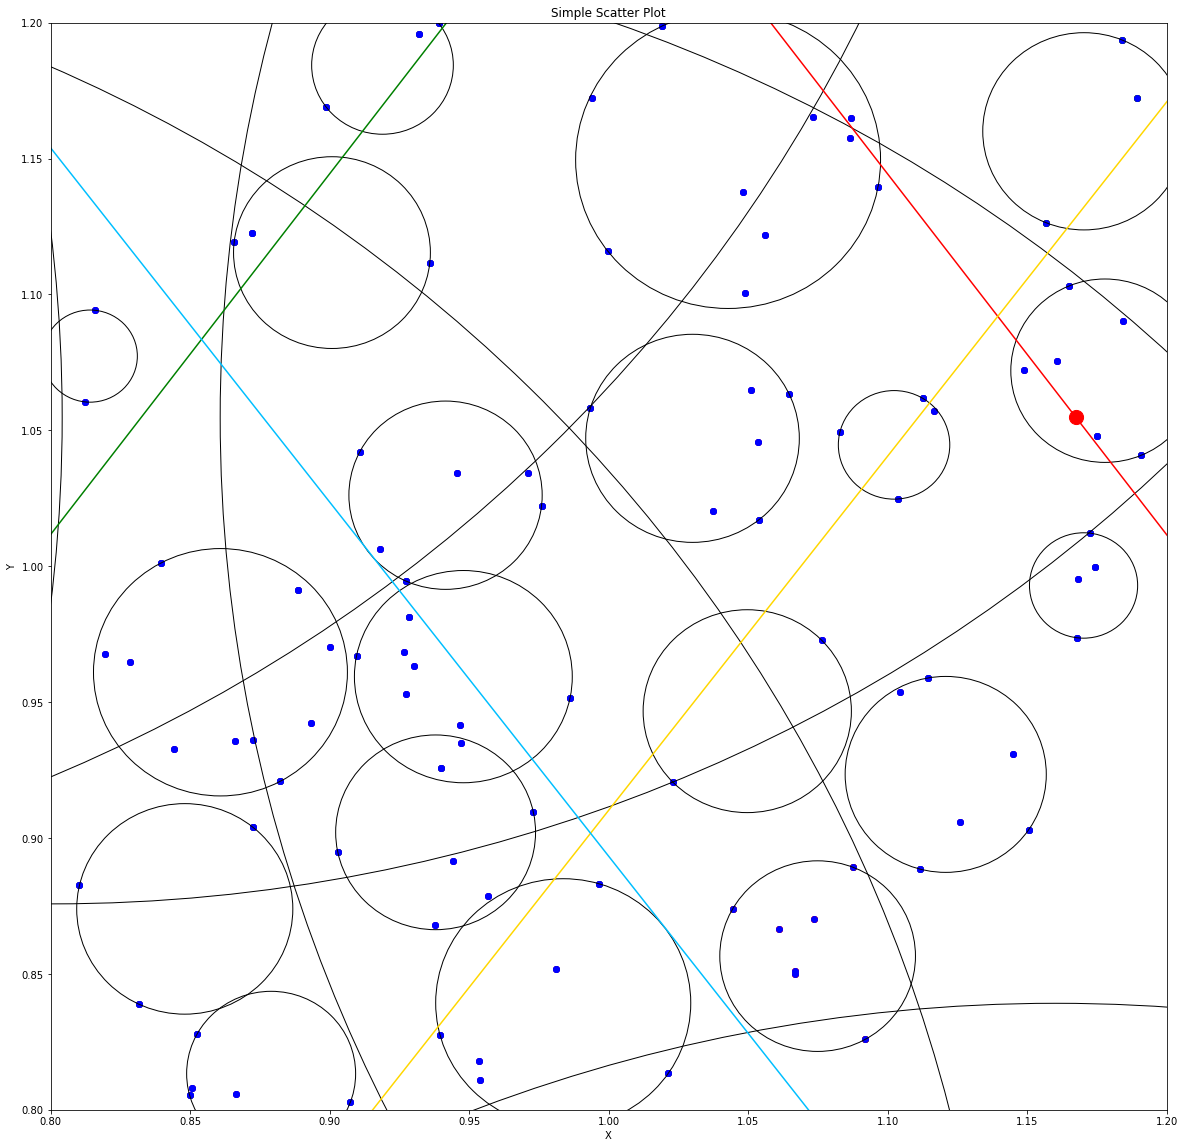

In [500]:
plt.figure(figsize=(20, 20))
# plt.style.use('classic')
plt.xlabel("X(km) * $\mathregular{10^3}$", fontsize=30)
plt.ylabel("Y(km) * $\mathregular{10^3}$", fontsize=30)

points = []
x = [random.uniform(0.8, 1.2) for _ in range(100)]
y = [random.uniform(0.8, 1.2) for _ in range(100)]
for i in range(len(x)):
    points.append((x[i], y[i]))

Clusters, BindingSets, Radiis, CurrentPoints, PointsWhichCluster = MultipleMinimaxLocation(points, 19)
points, Clusters, BindingSets, Radiis, PointsWhichCluster, CurrentPoints = rearrangement(points, Clusters, BindingSets, Radiis, PointsWhichCluster)

for i in range(len(x)):
    plt.scatter(points[i][0], points[i][1], c="b")

    
# RedLine_x, GreenLine_x, BlueLine_x, GlodLine_x = generateOrbit()
All_Center = np.zeros([NumberOfOrbit*SatellitePerOrbit*4, 2]) # 所有衛星的中心位置 # 共有 7 * 6 * 4 個衛星, (x,y)共兩軸
All_Center = Inintial_All_Center(All_Center)
# Satellites_Centers_at_time(All_Center, 10)

# 畫線
for i in range(NumberOfOrbit):
    plt.plot([RedLine_x[i][0], RedLine_x[i][-1]], [y_table[0], y_table[-1]], color='r')
    plt.plot([GreenLine_x[i][0], GreenLine_x[i][-1]], [y_table[0], y_table[-1]], color='g')
    plt.plot([BlueLine_x[i][0], BlueLine_x[i][-1]], [y_table[0], y_table[-1]], color='deepskyblue')
    plt.plot([GlodLine_x[i][0], GlodLine_x[i][-1]], [y_table[0], y_table[-1]], color='gold')
    
plt.xlim(0.8,1.2)
plt.ylim(0.8,1.2)
# linspace = np.linspace(0, 2, 3)
# plt.xticks(linspace)
# plt.yticks(linspace)

In [22]:
def ShadowedRicianRandGen(b, m, Omega, N, a):
    """
    Stochastic algorithms：Monte Carlo methods.
    
    Reference: "https://stackoverflow.com/questions/25471457/generating-random-numbers-with-a-given-probability-density-function"
    
    This function generates random number according to shadowed Rician
    density function - pdf.

    INPUTS:
           b = Scalar (real), Average power of multipath component
           m = Scalar (real), Fading severity parameter
           Omega = Scalar (real), Average power of LOS component
           N = Scalar (real) specifying number of random number to be 
                   generated
    OUTPUTS:
           X = Scalar (Column Vector if N > 1) specifying random number
               generated using Shadowed Rician distribution function
    """
    import random
    import scipy.special as sc
    
    # Implementation Starts Here
    X = np.zeros(N)
    
    # Intermediate Variables
    alpha = ((2*b*m)/(2*b*m + Omega))
    beta = Omega/(2*b*(2*b*m + Omega))
    lambda_0 = 1/(2*b)
    
    # Maximum value of Shadowed Rician value occurs at x = 0
    maxfx = (alpha**m) * lambda_0
    c = maxfx
    # Accept and Reject Algo.
    for i in range(N):
        accept = False
        while accept == False:
            U2 = random.uniform(0, c)
            U1 = random.uniform(0, a)

            fx = (alpha**m)*lambda_0*math.exp(-U1*lambda_0)*sc.hyp1f1(m, 1, beta*U1)

            if U2 <= fx:
                X[i] = U1
                accept = True
    return X

In [23]:
def calculate_channel_gain(dis, alpha_k):
    """
        Channel Coefficient: 參考來源 https://ieeexplore.ieee.org/document/9497773
        https://slideplayer.com/slide/5144285/
        Transmit Antenna Peak Gain: 參考來源 https://fcc.report/IBFS/SAT-AMD-20210818-00105/12950838
        Receiver Antenna Peak Gain: 參考來源 https://ieeexplore.ieee.org/document/9497773
        The Carrier Frequency: 19GHz, The Wave Length: 0.015789473684210527 m
    """
    WaveLength = 0.015789 # m
    TransmitAntennaPeakGain = 44.5 # dBi 
    ReceiverAntennaPeakGain = 41.7 # dBi 
    
    FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # dB
    H = TransmitAntennaPeakGain + ReceiverAntennaPeakGain - alpha_k - 2 - ShadowedRicianRandGen(1.29, 0.158, 19.4, N, a)[0] + FSPL

In [378]:
def calculate_beam_radiation(All_Center, CurrentPoints):
    from scipy.special import jv
    """ 當 satellite i 把 beam 打向 cell j 時, 對其他 cell k 造成的干擾"""
    Off_Axis = np.zeros((len(All_Center), len(CurrentPoints), len(CurrentPoints)))
    Alpha = np.zeros_like(Off_Axis)

    for i in range(Off_Axis.shape[0]):
        for j in range(Off_Axis.shape[1]):
            # 先判斷 satellite i 是否能夠打向 cell j
            if (math.sqrt((math.pow(All_Center[i][0] - CurrentPoints[j][0], 2) + math.pow(All_Center[i][1] - CurrentPoints[j][1], 2))) > 0.575):
                # 如果打不到 cell j, 則 表示 satellite i 打不到 cellj, 更不會對 cell k 造成干擾
                Off_Axis[i][j] = 1
                continue
            for k in range(Off_Axis.shape[2]):
                dis_A = math.sqrt((math.pow(All_Center[i][0] - CurrentPoints[j][0], 2) + math.pow(All_Center[i][1] - CurrentPoints[j][1], 2)) + math.pow(0.55, 2)) # satellite i 與 cell j 的距離
                dis_B = math.sqrt((math.pow(All_Center[i][0] - CurrentPoints[k][0], 2) + math.pow(All_Center[i][1] - CurrentPoints[k][1], 2)) + math.pow(0.55, 2)) # satellite i 與 cell k 的距離
                dis_A_B = math.sqrt(math.pow(CurrentPoints[j][0] - CurrentPoints[k][0], 2) + math.pow(CurrentPoints[j][1] - CurrentPoints[k][1], 2))
                cos_C = (math.pow(dis_A, 2) + math.pow(dis_B, 2) - math.pow(dis_A_B, 2)) / 2 / dis_A / dis_B
                if cos_C > 1:
                    cos_C = 1
                off_axis = math.acos(cos_C)
                Off_Axis[i][j][k] = off_axis # rad
    for i in range(Off_Axis.shape[0]):
        for j in range(Off_Axis.shape[1]):
            for k in range(Off_Axis.shape[2]):
                if Off_Axis[i][j][k] == 1: # 打不到
                    Alpha[i][j][k] = 0
                elif Off_Axis[i][j][k] == 0: # boresight
                    Alpha[i][j][k] = 1
                else:
#                     print(Off_Axis[i][j][k] * 180 / math.pi)
                    u_variable = 2.07123 * math.sin(Off_Axis[i][j][k]) / math.sin(5 * math.pi / 180) # math三角函數 input為 rad
                    alpha = abs((jv(1, u_variable) / 2 / u_variable) + (36 * jv(3, u_variable) / math.pow(u_variable, 3)))
                    Alpha[i][j][k] = alpha
                      
    return Alpha

In [379]:
Alpha = calculate_beam_radiation(All_Center, CurrentPoints)

In [823]:
import pandas as pd
df = pd.DataFrame({
    'Access':access_table[0],
    'RemainingTime':0,
    'QueueLength':Queues,
    'lambda':test,
    'Location_x':x,
    'Location_y':y
})
# d = pd.DataFrame({'第一欄':Ser1, '第二欄':Ser2})

In [865]:
def calculate_remaining_time(satellite_index, point, millisecond):
    """
        給一個衛星編號和一個點以及某個時刻, 可算出該衛星對於點在某個時候後的可持續服務時間.
    """
    count_0 = 0
    while True:
        SatellitesLocation = Satellites_Centers_at_time(All_Center, millisecond+count_0*1000)
        dis = math.sqrt(math.pow(SatellitesLocation[satellite_index][0] - point[0], 2) + math.pow(SatellitesLocation[satellite_index][1] - point[1], 2))
        if(dis > 0.5735):
            count_0 -= 1
            break
        count_0 += 1
    
    count_1 = 0
    while True:
        SatellitesLocation = Satellites_Centers_at_time(All_Center, millisecond+count_0*1000+count_1)
        dis = math.sqrt(math.pow(SatellitesLocation[satellite_index][0] - point[0], 2) + math.pow(SatellitesLocation[satellite_index][1] - point[1], 2))
        if(dis > 0.5735):
            count_1 -= 1
            break
        count_1 += 1
        
    return count_0*1000+count_1

In [855]:
test = df['Access']
for i in range(19):
    df.iloc[i, 1] = calculate_remaining_time(int(test[i]), CurrentPoints[i], 0)

KeyboardInterrupt: 

In [ ]:
df

In [804]:
# 平均到達率
for i in range(len(Clusters)):
    print("Queue Length:", Queues[i])
    test.append(10*len(Clusters[i]))
    print('Average arrival rate:', 10*len(Clusters[i]))
    print("access_satellite_index: ", access_table[0][i])
    print()

Queue Length: 70306.0
Average arrival rate: 70
access_satellite_index:  84.0

Queue Length: 30072.0
Average arrival rate: 30
access_satellite_index:  84.0

Queue Length: 59789.0
Average arrival rate: 60
access_satellite_index:  84.0

Queue Length: 79722.0
Average arrival rate: 80
access_satellite_index:  84.0

Queue Length: 59867.0
Average arrival rate: 60
access_satellite_index:  87.0

Queue Length: 39966.0
Average arrival rate: 40
access_satellite_index:  84.0

Queue Length: 19801.0
Average arrival rate: 20
access_satellite_index:  84.0

Queue Length: 60047.0
Average arrival rate: 60
access_satellite_index:  84.0

Queue Length: 40171.0
Average arrival rate: 40
access_satellite_index:  84.0

Queue Length: 29805.0
Average arrival rate: 30
access_satellite_index:  87.0

Queue Length: 49754.0
Average arrival rate: 50
access_satellite_index:  87.0

Queue Length: 29875.0
Average arrival rate: 30
access_satellite_index:  84.0

Queue Length: 99998.0
Average arrival rate: 100
access_satellite

In [791]:
# 候選衛星
for i in range(len(CurrentPoints)):
    distance, available_satellite_index = find_available_satellite(CurrentPoints[i], 10000)
    print(available_satellite_index)

[84, 87, 109, 134]
[59, 84, 87, 109]
[59, 84, 87, 106, 109, 134]
[59, 84, 87, 106, 109, 134]
[84, 87, 109, 134]
[59, 84, 87, 109]
[84, 87, 109, 134]
[59, 84, 87, 106, 109]
[84, 87, 109]
[84, 87, 106, 134]
[84, 87, 134]
[59, 84, 87, 106]
[59, 84, 87, 106, 134]
[84, 87, 109]
[59, 84, 87, 109]
[59, 61, 84, 87, 106, 134]
[59, 84, 87, 106, 109]
[59, 84, 87, 106, 109]
[84, 87, 134]


In [792]:
access_table[0]

array([84., 84., 84., 84., 87., 84., 84., 84., 84., 87., 87., 84., 87.,
       84., 84., 84., 84., 84., 87.])

In [501]:
def find_available_satellite(point, millisecond):
    Centers = copy.deepcopy(All_Center)
    Centers = Satellites_Centers_at_time(Centers, millisecond)
    mask = np.full(All_Center.shape[0], False)
    distance = []
    for i in range(len(Centers)):
        d = math.sqrt(math.pow((point[0]-Centers[i][0]),2) + math.pow((point[1]-Centers[i][1]), 2))
        if(d < 0.5735):
            distance.append(d)
            mask[i] = True
    available_satellite_index = list(np.where(mask)[0])
    return distance, available_satellite_index

In [866]:
for i in range(len(points)):
    distance, available_satellite_index = find_available_satellite(points[i], 0)
    for s in available_satellite_index:
        time = calculate_remaining_time(s, points[i], 0)
        print(time)
#         break
    break

10673
55374
109533
3634
46097


In [ ]:
def access_longest_satellite_until_unavailable(points, millisecond=0):
    for i in range(len(points)):
        distance, available_satellite_index = find_available_satellite(points[i], millisecond)
        for s in available_satellite_index:
            print(s)

In [734]:
def access_shortest_satellite_at_time(points, millisecond):
    """
        當每個 Group 都存取最近的衛星時：
        傳入欲計算的 points, 運算得在 millisecond 的時刻, 回傳 points 存取最近的衛星編號
    """
    Group_access_satellite = []
    for i in range(len(points)):
        distance, available_satellite_index = find_available_satellite(points[i], millisecond)
        Group_access_satellite.append(available_satellite_index[distance.index(min(distance))])
        
    return Group_access_satellite

def access_shortest_satellite_during_time(points, duration):
    access_table = np.zeros((duration, len(points)))
    for i in range(duration):
        access_table[i] = access_shortest_satellite_at_time(points, i)
#         if(i%2==0): # timeslot 為 2ms
#             access_table[int(i/2)] = access_shortest_satellite_at_time(points, i)
#         else:
#             continue
    return access_table

# distance, available_satellite_index = find_available_satellite(CurrentPoints[0], 0)
# access_shortest_satellite_during_time(CurrentPoints, 50)

In [737]:
access_table = access_shortest_satellite_during_time(CurrentPoints, 100)
access_table

array([[84., 84., 84., ..., 84., 84., 87.],
       [84., 84., 84., ..., 84., 84., 87.],
       [84., 84., 84., ..., 84., 84., 87.],
       ...,
       [84., 84., 84., ..., 84., 84., 87.],
       [84., 84., 84., ..., 84., 84., 87.],
       [84., 84., 84., ..., 84., 84., 87.]])

In [98]:
int(access_table[0][0]) # 衛星編號
All_Center[int(access_table[0][0])] # 衛星位置

array([0.81207595, 0.66528567])

In [747]:
Queues

array([ 70306.,  30072.,  59789.,  79722.,  59867.,  39966.,  19801.,
        60047.,  40171.,  29805.,  49754.,  29875.,  99998.,  60045.,
        59846.,  19809.,  30008., 100057.,  60057.])

In [766]:
def calculate_throughput_at_timeslot_vector(access_vector, Capacity_vector, Queues):
    """
        計算某一個 timeslot 的 throughput
    """
    dic = {}
    for i, j in enumerate(set(access_vector)):
        dic[j] = i    
    
    list2 = [[] for _ in range(len(set(access_vector)))]
    for i in range(len(access_vector)):
        list2[dic[access_vector[i]]].append(Queues[i])
    
    throughput = 0
    for i in range(len(list2)):
        tmp_list = sorted(list2[i], reverse=True)
        illustrate_pattern = tmp_list[:4] # Largest Queue Policy: 找最大的 4 個來打
        for j in illustrate_pattern:
            index = np.where(Queues==j)[0][0]
#             print(j, ', index = ', index)
#             print(Throughput_table[millisecond][index])
#             print()
            if(j<Capacity_vector[index]):
                throughput += j
            else:
                throughput += Capacity_vector[index]
            
#     print('throughput = ', throughput, 'bit per millisecond') 
    return throughput

In [780]:
def MySystem(Clusters, CurrentPoints, duration):
    Queues = np.zeros(len(Clusters))
    PowerConsumption_vector = np.zeros(len(Clusters))
    
    for millisecond in range(duration):
        # 根據每一群有幾人, 那一群的封包到達率為10*每個人 Mbps = 10*每個人*1000000*0.001 bpms 
        for i in range(len(Clusters)): 
            Queues[i] += np.random.poisson(10*len(Clusters[i])*1000, 1)
            
        Capacity_vector = np.zeros(len(Clusters))
        SatellitesLocation = Satellites_Centers_at_time(All_Center, millisecond)
        Signal = np.zeros(len(Clusters))
        interference = np.zeros((len(Clusters), len(Clusters)))
        Alpha = calculate_beam_radiation(SatellitesLocation, CurrentPoints)
        
        access_vector = access_shortest_satellite_at_time(CurrentPoints, millisecond)
            
        Signal, SUM_interference, PowerConsumption_vector = calculate_SINR_vector(access_vector, SatellitesLocation, Alpha, CurrentPoints)

        for i in range(len(Signal)):
            Capacity_vector[i] = 240*math.log2(1+(Signal[i] / SUM_interference[i])) * 0.001 # 毫秒 # Mbpms
            Capacity_vector[i] *= 1000000 # bpms
        
        throughput = calculate_throughput_at_timeslot_vector(access_vector, Capacity_vector, Queues)
        
        print('Throughput = ', throughput, 'bit per millisecond') 
        print('PowerComsuption = ', PowerConsumption_vector.sum(), 'J/ms')
        print()

In [781]:
MySystem(Clusters, CurrentPoints, 10)

Throughput =  580027.0 bit per millisecond
PowerComsuption =  0.00100122356981582 J/ms

Throughput =  974589.0388183757 bit per millisecond
PowerComsuption =  0.0010012229439563562 J/ms

Throughput =  1408388.6847372807 bit per millisecond
PowerComsuption =  0.0010012223185480945 J/ms

Throughput =  1600213.925875368 bit per millisecond
PowerComsuption =  0.0010012216935910425 J/ms

Throughput =  1619367.5362654962 bit per millisecond
PowerComsuption =  0.0010012210690852072 J/ms

Throughput =  1709559.6252546501 bit per millisecond
PowerComsuption =  0.0010012204450305978 J/ms

Throughput =  1713909.9424342264 bit per millisecond
PowerComsuption =  0.0010012198214272205 J/ms

Throughput =  1895488.3401812552 bit per millisecond
PowerComsuption =  0.0010012191982750845 J/ms

Throughput =  1486979.910874333 bit per millisecond
PowerComsuption =  0.0010012185755741965 J/ms

Throughput =  1547554.4658163465 bit per millisecond
PowerComsuption =  0.0010012179533245655 J/ms



In [772]:
def calculate_SINR_vector(access_vector, SatellitesLocation, Alpha, CurrentPoints):
    """
        這裡吃的不是 access_table, 而是 access_vector
    """
    Signal = np.zeros(len(Clusters))
    interference = np.zeros((len(Clusters), len(Clusters)))
    PowerConsumption_vector = np.zeros(len(Clusters))
    
    for i in range(len(access_vector)):
        for k in range(len(CurrentPoints)):
            if i == k:
                dis = math.sqrt(math.pow(SatellitesLocation[access_vector[i]][0] - CurrentPoints[k][0], 2) + math.pow(SatellitesLocation[access_vector[i]][1] - CurrentPoints[k][1], 2) + math.pow(0.55, 2))
                off_axis = math.acos(0.55 / dis) * 180 / math.pi
                EIRP = 0.00204 * math.pow(off_axis, 2) - 0.0066 * off_axis + 7.14 # [dBW/1MHz] # https://fcc.report/IBFS/SAT-LOA-20170726-00110/1252848
                EIRP += 10 * math.log10(240) # [dBW/240MHz]
                Power_t = EIRP - 44.5 # [dBW]
                dis *= 1000000 # 10**-3 km = 1000000 m
                FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # [dB]
                Signal[k] = Power_t + 44.5 + 41.7 - 3.125 - ShadowedRicianRandGen(b=0.158, m=19.4, Omega=1.29, N=1, a=10)[0] + FSPL #[dBW]
                Signal[k] /= 10
                Signal[k] = math.pow(10, Signal[k]) # [W]
                interference[i][k] = np.nan
            else: # 先算 interference 的 channel, 包含距離 和 off-axis
                dis = math.sqrt(math.pow(SatellitesLocation[access_vector[i]][0] - CurrentPoints[k][0], 2) + math.pow(SatellitesLocation[access_vector[i]][1] - CurrentPoints[k][1], 2) + math.pow(0.55, 2))
                dis *= 1000000 # 10**-3 km = 1000000 m
                FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # [dB]
                alpha_k = Alpha[access_vector[i]][i][k]
                
                if alpha_k == 0.0: # 打不到
                    alpha_k = 0
                    interference[i][k] = 0
                else:
                    alpha_k = 10*np.log10(alpha_k) # dB # 畫圖顯示應該是 10log10
                    interference[i][k] = 44.5 + 41.7 - 3.125 - ShadowedRicianRandGen(b=0.158, m=19.4, Omega=1.29, N=1, a=10)[0] + FSPL + alpha_k # [dBW] # 此時沒有 Power
                    
        # 獲得 Power_t後, 把 interference 轉成 W
        for k in range(len(CurrentPoints)): 
            interference[i][k] += Power_t
            interference[i][k] /= 10
            interference[i][k] = math.pow(10, interference[i][k]) # 單位 W
            
        # 先將功率轉成 W, 也就是 J/s, 再轉成 J/ms
        Power_t /= 10
        Power_t = math.pow(10, Power_t)
        PowerConsumption_vector[i] = Power_t * 0.001 # 毫秒 [J/ms]
    
    for i in range(interference.shape[0]):
        for j in range(interference.shape[1]):
            if(np.isnan(interference[i][j])):
                interference[i][j] = 0
                    
    SUM_interference = np.zeros(access_table.shape[1])
        
    for i in range(interference.shape[0]):
        for j in range(interference.shape[1]):
            SUM_interference[j] += interference[i][j]
    
    return Signal, SUM_interference, PowerConsumption_vector

In [740]:
def calcualte_SINR(access_table, SatellitesLocation, Alpha, millisecond, CurrentPoints):
    Signal = np.zeros(access_table.shape[1])
    interference = np.zeros((access_table.shape[1], access_table.shape[1]))
    PowerConsumption_vector = np.zeros(access_table.shape[1])
    for i in range(access_table.shape[1]):
        for k in range(len(CurrentPoints)):
            if i == k: # 衛星 i 照射 cell k 時
                dis = math.sqrt(math.pow(SatellitesLocation[int(access_table[millisecond][i])][0] - CurrentPoints[k][0], 2)+math.pow(SatellitesLocation[int(access_table[millisecond][i])][1] - CurrentPoints[k][1], 2)+math.pow(0.55, 2))
                off_axis = math.acos(0.55 / dis) * 180 / math.pi
                EIRP = 0.00204 * math.pow(off_axis, 2) - 0.0066 * off_axis + 7.14 # [dBW/1MHz] # https://fcc.report/IBFS/SAT-LOA-20170726-00110/1252848
                EIRP += 10 * math.log10(240) # [dBW/240MHz]
                Power_t = EIRP - 44.5 # [dBW]
#                     print(Power_t)
                dis *= 1000000 # 10**-3km
                FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # [dB]
                Signal[k] = Power_t + 44.5 + 41.7 - 3.125 - ShadowedRicianRandGen(b=0.158, m=19.4, Omega=1.29, N=1, a=10)[0] + FSPL #[dBW]
                Signal[k] /= 10
                Signal[k] = math.pow(10, Signal[k]) # [W]
                interference[i][k] = np.nan
            else: # 先算 interference 的 channel, 包含距離 和 off-axis
                dis = math.sqrt(math.pow(SatellitesLocation[int(access_table[millisecond][i])][0] - CurrentPoints[k][0], 2)+math.pow(SatellitesLocation[int(access_table[millisecond][i])][1] - CurrentPoints[k][1], 2)+math.pow(0.55, 2))
                dis *= 1000000 # 10**-3km
                FSPL = 20*math.log10(0.015789 / 4 / math.pi / dis) # [dB]
                alpha_k = Alpha[int(access_table[millisecond][i])][i][k]

                if alpha_k == 0.0: # 打不到
                    alpha_k = 0
                    interference[i][k] = 0
                else:
                    alpha_k = 10*np.log10(alpha_k) # dB # 畫圖顯示應該是 10log10
#                         print(alpha_k)
                    interference[i][k] = 44.5 + 41.7 - 3.125 - ShadowedRicianRandGen(b=0.158, m=19.4, Omega=1.29, N=1, a=10)[0] + FSPL + alpha_k # [dBW]
                        
        # 獲得 Power_t後, 把 interference 轉成 W
        for k in range(len(CurrentPoints)): 
            interference[i][k] += Power_t
            interference[i][k] /= 10
            interference[i][k] = math.pow(10, interference[i][k]) # 單位 W
            
        # 先將功率轉成 W, 也就是 J/s, 再轉成 J/ms
        Power_t /= 10
        Power_t = math.pow(10, Power_t)
        PowerConsumption_vector[i] = Power_t * 0.001 # 毫秒
            
    for i in range(interference.shape[0]):
        for j in range(interference.shape[1]):
            if(np.isnan(interference[i][j])):
                interference[i][j] = 0
                    
    SUM_interference = np.zeros(access_table.shape[1])
        
    for i in range(interference.shape[0]):
        for j in range(interference.shape[1]):
            SUM_interference[j] += interference[i][j]
    
    return Signal, SUM_interference, PowerConsumption_vector

In [741]:
def calculate_throughput(access_table):
    Queues = np.zeros(len(Clusters))
    PowerConsumption_table = np.zeros((access_table.shape[0], access_table.shape[1]))

    for millisecond in range(access_table.shape[0]):
        Capacity_vector = np.zeros(access_table.shape[1])
        for i in range(len(Clusters)): # 根據每一群有幾人, 那一群的封包到達率為10*每個人 Mbps = 10*每個人*1000000*0.001 bpms 
            Queues[i] += np.random.poisson(10*len(Clusters[i])*1000, 1)
            
        SatellitesLocation = Satellites_Centers_at_time(All_Center, millisecond)
        Signal = np.zeros(access_table.shape[1])
        interference = np.zeros((access_table.shape[1], access_table.shape[1]))
        Alpha = calculate_beam_radiation(SatellitesLocation, CurrentPoints)
            
        Signal, SUM_interference, PowerConsumption_vector = calcualte_SINR(access_table, SatellitesLocation, Alpha, millisecond, CurrentPoints)

        for i in range(len(Signal)):
            Capacity_vector[i] = 240*math.log2(1+(Signal[i] / SUM_interference[i])) * 0.001 # 毫秒 # Mbpms
            Capacity_vector[i] *= 1000000 # bpms
        
        calculate_throughput_at_timeslot(access_table, millisecond, Capacity_vector, Queues)

#     return Throughput_table, PowerConsumption_table

In [742]:
Throughput_table, PowerConsumption_table = calculate_throughput(access_table)

# for i in range(len(Throughput_table)):
#      print(Throughput_table[i])

throughput =  581020.0 bit per millisecond
throughput =  1084474.2816323184 bit per millisecond
throughput =  1397266.2182481454 bit per millisecond
throughput =  1566827.3456597142 bit per millisecond
throughput =  1477723.5169618744 bit per millisecond
throughput =  1527734.0905711707 bit per millisecond
throughput =  1533639.165690134 bit per millisecond
throughput =  1575357.7010645072 bit per millisecond
throughput =  1850388.1109982706 bit per millisecond
throughput =  1654858.0921310391 bit per millisecond
throughput =  1896538.648988485 bit per millisecond
throughput =  1708339.8497136987 bit per millisecond
throughput =  1713067.020823866 bit per millisecond
throughput =  1611762.656917445 bit per millisecond
throughput =  1471294.8258432094 bit per millisecond
throughput =  1768008.2958655825 bit per millisecond
throughput =  1603979.8163848482 bit per millisecond
throughput =  1942377.7962372336 bit per millisecond
throughput =  1457626.320172451 bit per millisecond
throughp

In [535]:
PowerConsumption_table

array([[5.31945796e-05, 4.58168272e-05, 5.40252214e-05, 5.51509350e-05,
        5.63131231e-05, 4.45904305e-05, 4.86526821e-05, 4.73384030e-05,
        4.45023229e-05, 5.30724836e-05, 4.92356643e-05, 5.87961938e-05,
        6.26711082e-05, 4.74331787e-05, 4.40274197e-05, 6.94540687e-05,
        5.95886745e-05, 4.84445763e-05, 5.89156771e-05],
       [5.31942575e-05, 4.58170647e-05, 5.40255778e-05, 5.51511120e-05,
        5.63123282e-05, 4.45905114e-05, 4.86526351e-05, 4.73386326e-05,
        4.45021933e-05, 5.30718711e-05, 4.92351559e-05, 5.87968599e-05,
        6.26702346e-05, 4.74329481e-05, 4.40274254e-05, 6.94548115e-05,
        5.95894825e-05, 4.84450351e-05, 5.89148074e-05],
       [5.31939355e-05, 4.58173022e-05, 5.40259342e-05, 5.51512890e-05,
        5.63115333e-05, 4.45905923e-05, 4.86525881e-05, 4.73388622e-05,
        4.45020637e-05, 5.30712586e-05, 4.92346475e-05, 5.87975261e-05,
        6.26693610e-05, 4.74327175e-05, 4.40274312e-05, 6.94555542e-05,
        5.95902905e-05

In [545]:
from collections import Counter

count = Counter(access_table[0])
del count, Counter

In [550]:
test = access_table[0]
test

array([84., 84., 84., 84., 87., 84., 84., 84., 84., 87., 87., 84., 87.,
       84., 84., 84., 84., 84., 87.])

In [559]:
test = access_table[0]
dic = {}
for i, j in enumerate(set(test)):
    dic[j] = i    

In [558]:
dic

{84.0: 0, 87.0: 1}

In [625]:
Queues

array([ 70306.,  30072.,  59789.,  79722.,  59867.,  39966.,  19801.,
        60047.,  40171.,  29805.,  49754.,  29875.,  99998.,  60045.,
        59846.,  19809.,  30008., 100057.,  60057.])

In [640]:
test = access_table[0]
list2 = [[] for _ in range(len(set(test)))]

for i in range(len(access_table[0])):
    list2[dic[test[i]]].append(Queues[i])

In [676]:
list2

[[70306.0,
  30072.0,
  59789.0,
  79722.0,
  39966.0,
  19801.0,
  60047.0,
  40171.0,
  29875.0,
  60045.0,
  59846.0,
  19809.0,
  30008.0,
  100057.0],
 [59867.0, 29805.0, 49754.0, 99998.0, 60057.0]]

In [731]:
def calculate_throughput_at_timeslot(access_table, millisecond, Capacity_vector, Queues):
    """
        計算某一個 timeslot 的 throughput
    """
    access_vector = access_table[millisecond]
    dic = {}
    for i, j in enumerate(set(access_vector)):
        dic[j] = i    
    
    list2 = [[] for _ in range(len(set(access_vector)))]
    for i in range(len(access_vector)):
        list2[dic[access_vector[i]]].append(Queues[i])
    
    throughput = 0
    for i in range(len(list2)):
        tmp_list = sorted(list2[i], reverse=True)
        illustrate_pattern = tmp_list[:4] # Largest Queue Policy: 找最大的 4 個來打
        for j in illustrate_pattern:
            index = np.where(Queues==j)[0][0]
#             print(j, ', index = ', index)
#             print(Throughput_table[millisecond][index])
#             print()
            if(j<Capacity_vector[index]):
                throughput += j
            else:
                throughput += Capacity_vector[index]
            
    print('throughput = ', throughput, 'bit per millisecond') 

In [680]:
calculate_throughput_at_timeslot(access_table, 0)

throughput =  579808.0 bit per millisecond


In [539]:
for i in range(len(Clusters)):
    print(10*len(Clusters[i]))

70
30
60
80
60
40
20
60
40
30
50
30
100
60
60
20
30
100
60


In [621]:
# "https://ieeexplore.ieee.org/document/9693289" 文中模型 cell 的 arrival rate 從 50 Mbps 到 100 Mbps
# 那我每個 UE 的平均 arrival rate為 10Mbps
Queues = np.zeros(len(Clusters))

for i in range(len(Clusters)): # 根據每一群有幾人, 那一群的封包到達率為10*每個人 Mbps = 10*每個人*1000000*0.001 bpms 
    Queues[i] += np.random.poisson(10*len(Clusters[i])*1000, 1)
    
Queues    

array([ 70306.,  30072.,  59789.,  79722.,  59867.,  39966.,  19801.,
        60047.,  40171.,  29805.,  49754.,  29875.,  99998.,  60045.,
        59846.,  19809.,  30008., 100057.,  60057.])